# 1. Introduction

Fake job postings are deceptive listings created with malicious intent—often aiming to scam job seekers or harvest personal data. These fraudulent listings can appear highly convincing, featuring attractive salaries, vague job descriptions, or fabricated company details. The key challenge lies in distinguishing these fake postings from legitimate ones, particularly as scammers refine their tactics to closely mimic genuine listings.

## 1.1 Why Is This Problem Interesting?

1. **Real-World Risks**  
   Fraudulent job listings can lead to identity theft, financial fraud, and exploitation. Effective detection mechanisms are critical to protect job seekers and enhance the trustworthiness of job platforms.

2. **Lack of Labels**  
   Since most job listings are not labeled as "fraudulent" or "genuine," supervised learning methods are difficult to apply. Unsupervised anomaly detection provides an opportunity to identify outliers without needing labeled data.

3. **Subtle Nature of Fraud**  
   Many fake job postings are carefully crafted to appear legitimate. This makes them hard to detect using simple rules or surface-level checks. Anomaly detection can uncover deeper, hidden inconsistencies.

## 1.2 Overview of the Dataset

We use the [Fake Job Postings dataset from Kaggle](https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction), which includes features such as:

- **Job Description**: Detailed free-text outlining responsibilities.
- **Company Details**: Textual and categorical descriptions of the hiring company.
- **Salary Information**: Numerical fields showing pay range and variability.
- **Location & Metadata**: Clues such as location, telecommuting status, and presence of a company logo.

Due to the lack of reliable fraud labels, an unsupervised anomaly detection approach is appropriate for uncovering potentially fraudulent listings.

---

# 2. Research Question

> **“Can we detect fraudulent job postings in an unsupervised manner using Isolation Forest and One-Class SVM, and which method offers better anomaly detection performance?”**

This research question drives our investigation by comparing two unsupervised anomaly detection models—Isolation Forest and One-Class SVM—on their ability to identify unusual patterns in job descriptions, salaries, and company details.

---

# 3. Modeling Strategy

We apply two widely used anomaly detection models using the same preprocessed dataset:

### 3.1 Isolation Forest (IF)
Isolation Forest isolates anomalies based on how easily data points are separated through recursive random partitioning. Anomalies are isolated in fewer splits, making them more easily identifiable.

### 3.2 One-Class SVM (OCSVM)
One-Class SVM fits a boundary around "normal" data and flags any point outside this boundary as an anomaly. It is kernel-based and suitable for capturing nonlinear patterns in data.

### Consistency in Features:
Both models were trained on the same feature set, which included:
- **Numerical features** such as salary range statistics
- **Boolean and categorical metadata**, including telecommuting status, company logo presence, and question prompts

---

# 4. Data Handling and Preparation

Our data handling process ensures the reliability and quality of inputs for both models. We break it down into three core stages:

1. **Data Cleaning**:  
   Identify and handle missing values, inconsistent types, and outliers through visual inspection and statistical methods.

2. **Feature Engineering**:  
   Enrich raw features through transformations—such as derived salary ranges, metadata indicators, and encoded categorical fields.

3. **Standardization**:  
   Normalize numerical values and encode categorical fields to prepare for modeling.

---

# 5. Data Cleaning Process

### 5.1 Visualization

- Histogram and density plots for numerical data (e.g., salary)
- Categorical frequency plots for job types or sectors
- Missing data visualizations using heatmaps or bar charts
- Correlation heatmaps to detect redundancies

### 5.2 Investigation

- Remove or cap outliers using IQR
- Fill missing values using mean, median, or mode
- Drop columns with excessive nulls
- Ensure data types are appropriate for modeling (e.g., float, int, string)

### 5.3 Final Cleaning

- Apply standardization using z-score or MinMax scaling
- One-hot encode categorical values
- Save the cleaned dataset for reproducibility and model input

---

# 6. Feature Engineering

## Goal:
To transform raw job posting data into structured, meaningful features that enhance the model’s ability to detect anomalies.

## Feature Creation & Transformation:

| Feature Type         | Description                                                              | Examples                                |
|----------------------|---------------------------------------------------------------------------|-----------------------------------------|
| **Numerical**        | Derived continuous variables from raw fields                             | `salary_range`                          |
| **Boolean Flags**    | Binary indicators extracted from metadata                                | `has_salary_info`, `telecommuting`, `has_company_logo`, `has_questions` |
| **Aggregated Counts**| Computed counts of usable or valid data for a posting                    | `num_categorical_features`              |

## Validation:
- All engineered features were checked for **missing values** — none were found.
- Summary statistics (mean, std, min, max) were used to validate scaling and distributions.
- A combined histogram plot was created to visualize the distribution of all engineered features.

## Outcome:
A validated and normalized set of **numeric and binary features** was used in both Isolation Forest and One-Class SVM models, forming the core input for anomaly detection.

---

# 7. Modeling: Isolation Forest vs One-Class SVM

We apply both unsupervised models to detect anomalies:

### 7.1 Isolation Forest (IF)
- **Setup**: Configured with contamination rate and default parameters
- **Training**: Learns “normal” patterns by randomly partitioning data
- **Output**: Scores indicating how easily a point is isolated

### 7.2 One-Class SVM (OCSVM)
- **Setup**: Uses RBF kernel and predefined `nu` for expected outlier fraction
- **Training**: Builds a decision boundary around majority data
- **Output**: Negative decision scores → flagged as outliers

### Outcome:
Each model outputs anomaly scores, which we threshold to classify potential frauds.

---

# 8. Model Evaluation & Comparison

If ground truth labels (`fraudulent`) are available, we compare IF and OCSVM using:

### 8.1 Metrics:
- **Precision**: Proportion of flagged frauds that are actually fraudulent
- **Recall**: Proportion of all actual frauds that were detected
- **F1 Score**: Harmonic mean of precision and recall
- **ROC AUC**: Ability to separate fraud from non-fraud
- **Confusion Matrix**: Visualization of prediction accuracy

### 8.2 Sample Comparison Table

| Model               | Precision | Recall | F1 Score | ROC AUC |
|---------------------|-----------|--------|----------|---------|
| IF without NLP      | 0.0993    | 0.1998 | 0.1327   | 0.7156  |
| IF with NLP         | 0.0436    | 0.0901 | 0.0588   | 0.4876  |
| OCSVM without NLP   | 0.0944    | 0.2571 | 0.1373   | 0.7276  |
| OCSVM with NLP      | 0.1120    | 0.2389 | 0.1508   | 0.6511  |

> Based on these metrics, One-Class SVM outperformed Isolation Forest in all configurations. Interestingly, adding NLP features slightly improved precision for OCSVM but significantly reduced performance for IF.

---

# 9. Interpretation & Insights

### 9.1 Score Distributions
- Histograms of anomaly scores show that OCSVM creates a clearer separation between normal and anomalous samples than IF.

### 9.2 Examples of Flagged Postings
- Many flagged listings show signs of:
  - Missing job descriptions or company profiles
  - Inflated salary ranges
  - Generic titles with high-frequency keywords

### 9.3 Feature Contributions
- Salary-based features were influential in identifying outliers
- Boolean metadata like missing logos and vague descriptions helped flag anomalies

### 9.4 Final Takeaways
- Isolation Forest is fast and scalable but had lower detection accuracy overall.
- One-Class SVM outperformed IF in precision, recall, and F1-score.
- Across all settings, **OCSVM without NLP** delivered the best results in both ROC AUC and F1.
- Surprisingly, **adding NLP features did not improve performance** for either model—and for IF, it led to significant performance drops.
- This suggests that in this specific dataset, NLP features may have introduced noise or sparsity that hindered anomaly detection rather than helping it.

 ---

# Data Cleaning Process

##  Visualisation

### Import Libraries

In [496]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import regex as re

import warnings
warnings.filterwarnings('ignore')

### Overview of Column Features:
- Shape of Data
- Number of Non-Null Values
- Data Type for Column Features

In [498]:
# Read the CSV from the zipped file.
# (Make sure the file 'fake_job_postings.csv.zip' is in your working directory.)
unclean_posting = pd.read_csv('fake_job_postings.csv.zip')


# Quick look at the data
unclean_posting.head()
unclean_posting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

### Distribution of Fake & Real Job Postings

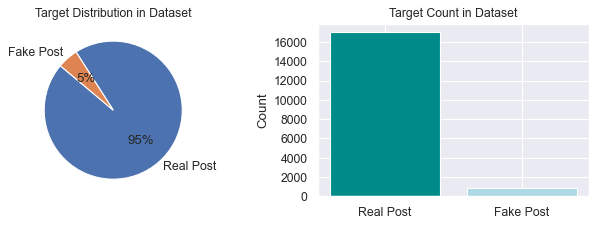

In [500]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Use the correct DataFrame
df = unclean_posting  # Assigning the correct DataFrame

# Ensure the column "fraudulent" exists before proceeding
if "fraudulent" in df.columns:
    realnum = df["fraudulent"].value_counts().get(0, 0)  # Get count of real posts, default to 0 if missing
    fakenum = df["fraudulent"].value_counts().get(1, 0)  # Get count of fake posts, default to 0 if missing

    # Create a 2-column subplot with a smaller size & lower DPI to fit on screen
    fig, axs = plt.subplots(ncols=2, figsize=(8, 3), dpi=80)

    # 1) Pie Chart (Left subplot)
    axs[0].pie(
        [realnum, fakenum],
        labels=["Real Post", "Fake Post"],
        autopct="%.0f%%",  # Show integer percentages
        startangle=140
    )
    axs[0].set_title("Target Distribution in Dataset", fontsize=11)

    # 2) Bar Chart (Right subplot)
    axs[1].bar(["Real Post", "Fake Post"], [realnum, fakenum], color=["darkcyan", "lightblue"])
    axs[1].set_title("Target Count in Dataset", fontsize=11)
    axs[1].set_ylabel("Count")

    # Force y-axis to show only whole number ticks
    axs[1].yaxis.set_major_locator(mticker.MaxNLocator(integer=True))

    # Adjust layout for better readability
    plt.tight_layout()
    plt.show()
else:
    print("Error: Column 'fraudulent' not found in DataFrame.")

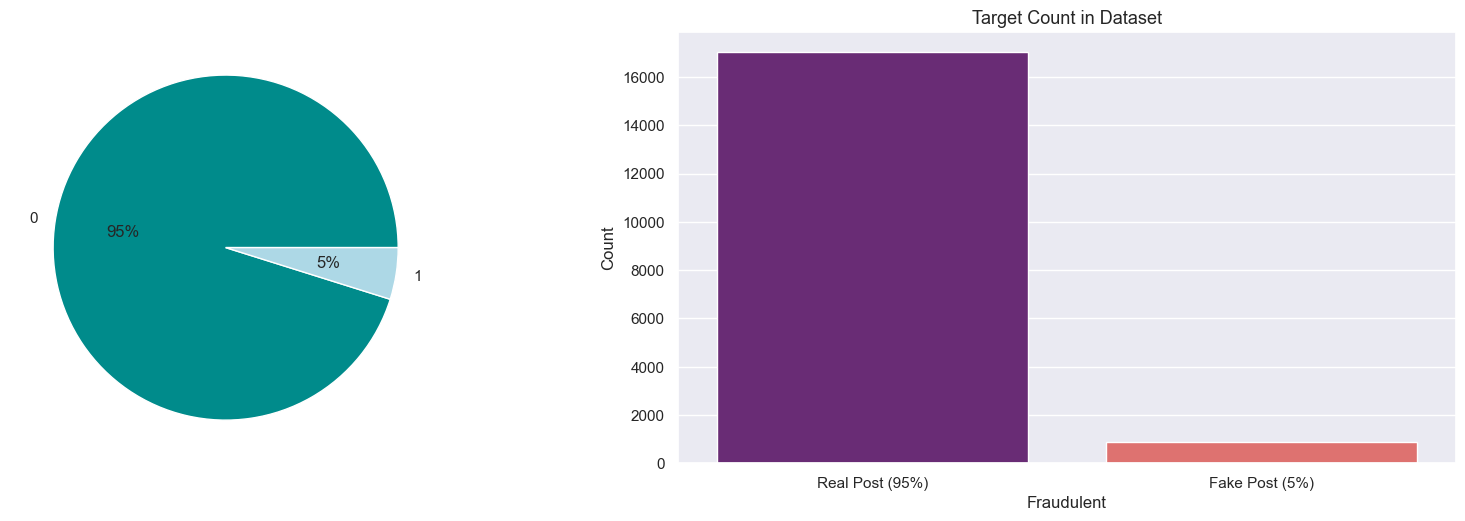

In [501]:
import matplotlib.pyplot as plt
import seaborn as sb

# Define colors
my_colors = ['darkcyan', 'lightblue']

# Create subplots
fig, axes = plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
plt.tight_layout()

# Pie chart
unclean_posting["fraudulent"].value_counts().plot(
    kind='pie', colors=my_colors, ax=axes[0], autopct="%.0f%%"
)
axes[0].set_ylabel('')  # Remove y-label for better appearance

# Bar chart
temp = unclean_posting["fraudulent"].value_counts().reset_index()
temp.columns = ['Fraudulent', 'Count']

# Corrected seaborn barplot
sb.barplot(x='Fraudulent', y='Count', data=temp, ax=axes[1], palette="magma")

axes[1].set_xticklabels(["Real Post (95%)", "Fake Post (5%)"])
axes[1].set_title("Target Count in Dataset", fontsize=13)
axes[1].set_ylabel("Count")

plt.show()

### Heat Map of Relative Percentage of Data Points for each Class in Categorical Variables
- Boolean (telecommuting, has_company_logo, has_questions)
- Multi-Class (employment_type, required_experience, required_education)

<Axes: xlabel='fraudulent', ylabel='telecommuting'>

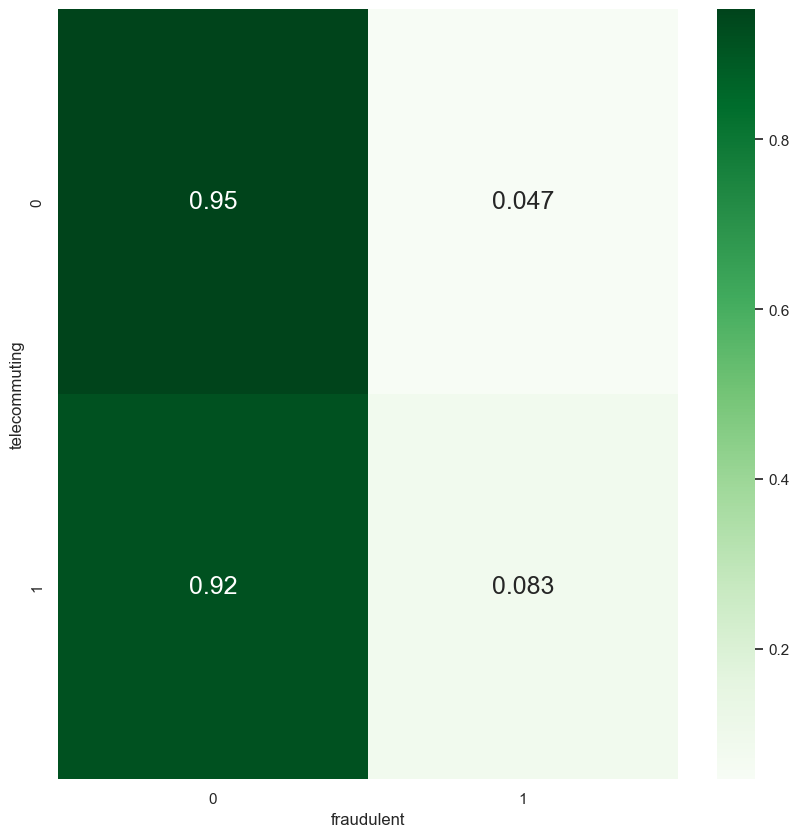

In [503]:
# Function for obtaining confusion matrix and normalizing class data
def feature_meaning(feature):
    mat = unclean_posting.groupby([feature, 'fraudulent']).size().unstack()
    mat[0] = mat[0].astype(np.float64)
    mat[1] = mat[1].astype(np.float64)
    cat_len = mat.shape[0]    
    
    for i in range(0,cat_len):
        sub_sum = mat[0][i] + mat[1][i]
        mat[0][i] = mat[0][i]/sub_sum
        mat[1][i] = mat[1][i]/sub_sum
    return(mat)


# Heatmap of Telecommuting feature
feature = 'telecommuting'
mat = feature_meaning(feature)

f, axes = plt.subplots(1,1, figsize = (10,10))
sb.heatmap(mat, annot = True, annot_kws={'size': 18}, cmap = 'Greens')

<Axes: xlabel='fraudulent', ylabel='has_company_logo'>

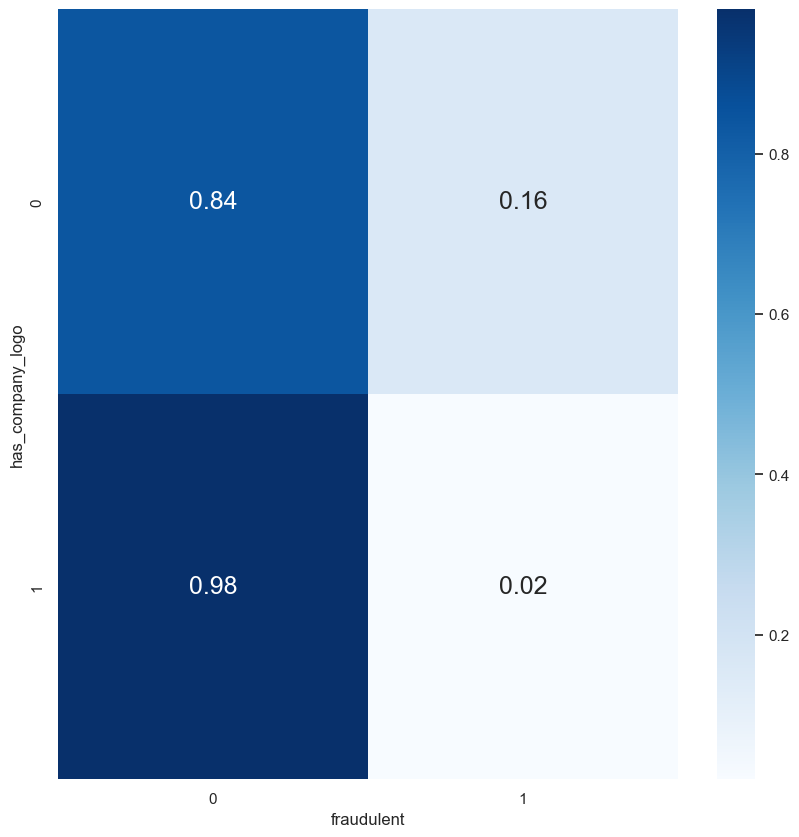

In [504]:
# Heatmap of has_company_logo feature
feature = 'has_company_logo'
mat = feature_meaning(feature)

f, axes = plt.subplots(1,1, figsize = (10,10))
sb.heatmap(mat, annot = True, annot_kws={'size': 18}, cmap = 'Blues')

<Axes: xlabel='fraudulent', ylabel='has_questions'>

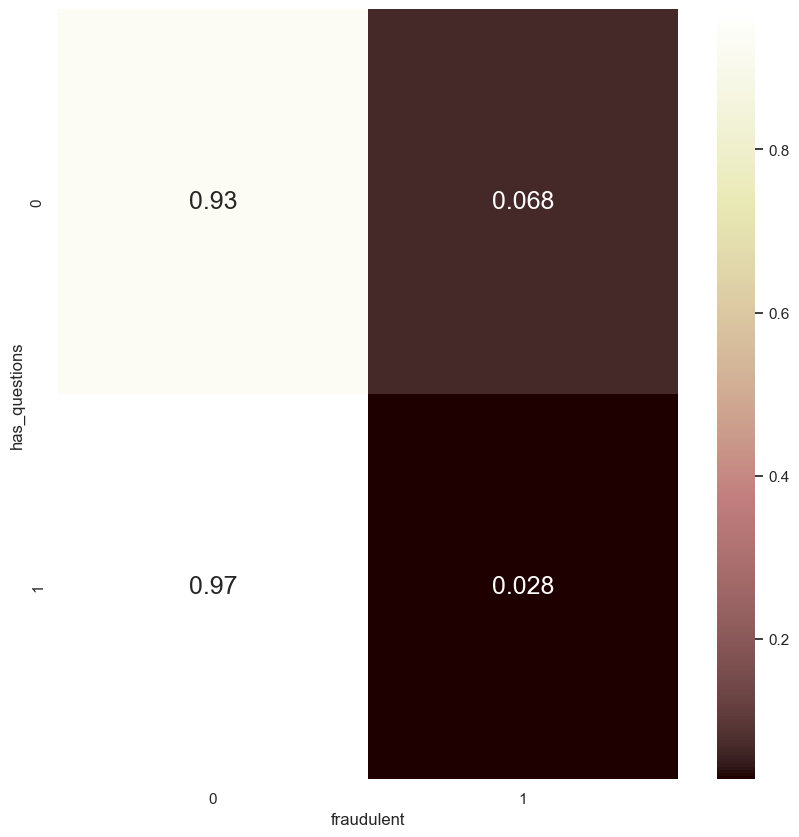

In [505]:
# Heatmap of has_questions feature
feature = 'has_questions'
mat = feature_meaning(feature)

f, axes = plt.subplots(1,1, figsize = (10,10))
sb.heatmap(mat, annot = True, annot_kws={'size': 18}, cmap = 'pink')

<Axes: xlabel='fraudulent', ylabel='employment_type'>

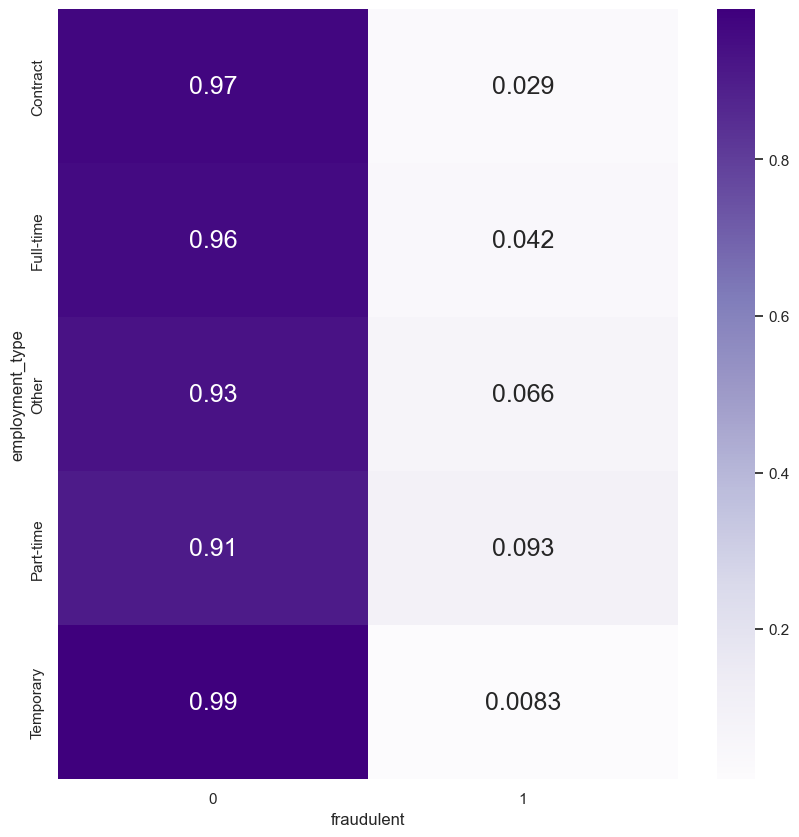

In [506]:
# Heatmap of employment_type feature
feature = 'employment_type'
mat = feature_meaning(feature)

f, axes = plt.subplots(1,1, figsize = (10,10))
sb.heatmap(mat, annot = True, annot_kws={'size': 18}, cmap = 'Purples')

<Axes: xlabel='fraudulent', ylabel='required_experience'>

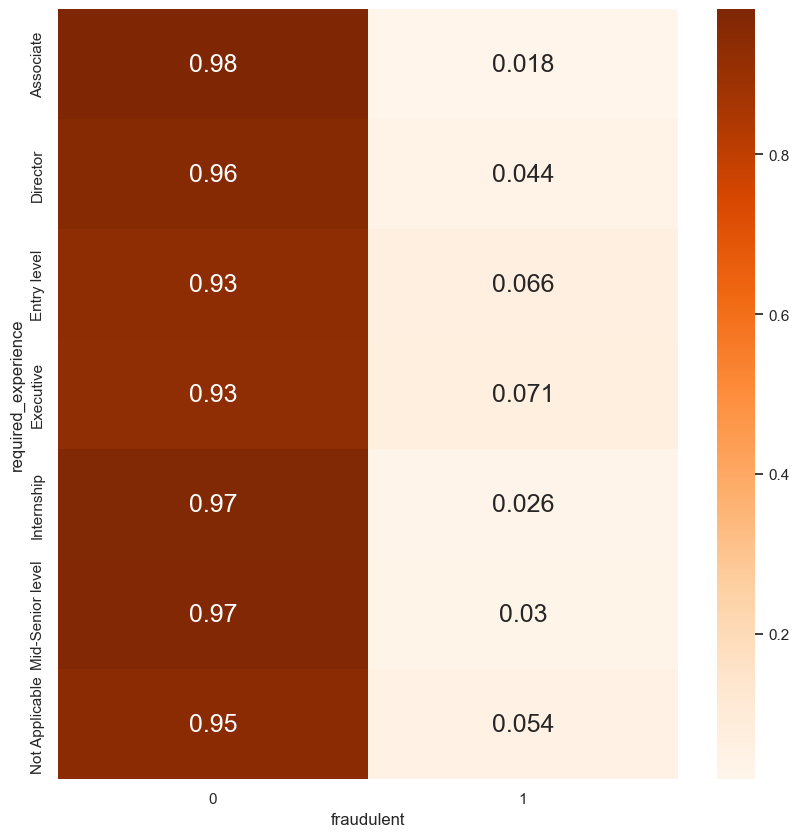

In [507]:
# Heatmap of required_experience feature
feature = 'required_experience'
mat = feature_meaning(feature)

f, axes = plt.subplots(1,1, figsize = (10,10))
sb.heatmap(mat, annot = True, annot_kws={'size': 18}, cmap = 'Oranges')

<Axes: xlabel='fraudulent', ylabel='required_education'>

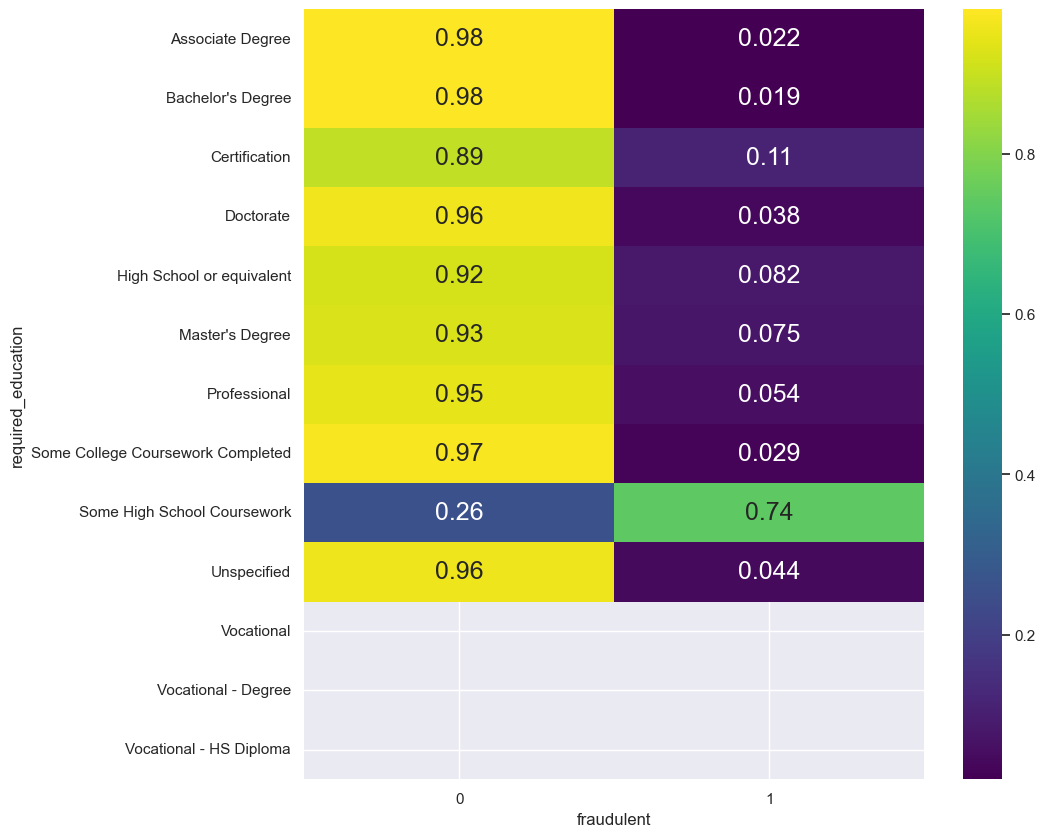

In [508]:
# Heatmap of required_education feature
feature = 'required_education'
mat = feature_meaning(feature)

f, axes = plt.subplots(1,1, figsize = (10,10))
sb.heatmap(mat, annot = True, annot_kws={'size': 18}, cmap = 'viridis')

### Top Class Values for Categorical Features
- Title
- Industry
- Function

In [510]:
# Top titles and count of fraudulent jobs
print(unclean_posting[unclean_posting.fraudulent==1].title.value_counts()[:10])

title
Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Name: count, dtype: int64


In [511]:
# Top titles and count of real jobs
print(unclean_posting[unclean_posting.fraudulent==0].title.value_counts()[:10])

title
English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Name: count, dtype: int64


In [512]:
# Top industries and count of fraudulent jobs
print(unclean_posting[unclean_posting.fraudulent==1].industry.value_counts()[:10])

industry
Oil & Energy                           109
Accounting                              57
Hospital & Health Care                  51
Marketing and Advertising               45
Financial Services                      35
Information Technology and Services     32
Telecommunications                      26
Real Estate                             24
Consumer Services                       24
Leisure, Travel & Tourism               21
Name: count, dtype: int64


In [513]:
# Top industries and count of real jobs
print(unclean_posting[unclean_posting.fraudulent==0].industry.value_counts()[:10])

industry
Information Technology and Services    1702
Computer Software                      1371
Internet                               1062
Education Management                    822
Marketing and Advertising               783
Financial Services                      744
Hospital & Health Care                  446
Consumer Services                       334
Telecommunications                      316
Retail                                  218
Name: count, dtype: int64


In [514]:
# Top functions and count of fraudulent jobs
print(unclean_posting[unclean_posting.fraudulent==1].function.value_counts()[:10])

function
Administrative            119
Engineering               113
Customer Service           67
Sales                      41
Other                      32
Information Technology     32
Accounting/Auditing        29
Finance                    15
Business Development       13
Marketing                  10
Name: count, dtype: int64


In [515]:
# Top functions and count of real jobs
print(unclean_posting[unclean_posting.fraudulent==0].function.value_counts()[:10])

function
Information Technology    1717
Sales                     1427
Engineering               1235
Customer Service          1162
Marketing                  820
Administrative             511
Health Care Provider       337
Design                     337
Education                  324
Management                 311
Name: count, dtype: int64


In [649]:
unclean_posting[['description', 'company_profile', 'requirements', 'benefits']] = unclean_posting[['description', 'company_profile', 'requirements', 'benefits']].map(str)
unclean_posting['text'] = unclean_posting['description'] + ' ' +unclean_posting['company_profile'] + ' ' + unclean_posting['requirements'] + ' ' + unclean_posting['benefits']

fraudjobs_text = unclean_posting[unclean_posting.fraudulent==1].text
actualjobs_text = unclean_posting[unclean_posting.fraudulent==0].text

In [651]:
print(unclean_posting[['description', 'company_profile', 'requirements', 'benefits', 'text']].head())

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                     company_profile  \
0  We're Food52, and we've created a groundbreaki...   
1  90 Seconds, the worlds Cloud Video Production ...   
2  Valor Services provides Workforce Solutions th...   
3  Our passion for improving quality of life thro...   
4  SpotSource Solutions LLC is a Global Human Cap...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of T

In [653]:
# Display first 3 full text samples clearly
for i, text in enumerate(unclean_posting['text'].head(3)):
    print(f"--- Combined Text Sample {i+1} ---\n{text}\n")

--- Combined Text Sample 1 ---
Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and curated recipe hub, is currently interviewing full- and part-time unpaid interns to work in a small team of editors, executives, and developers in its New York City headquarters.Reproducing and/or repackaging existing Food52 content for a number of partner sites, such as Huffington Post, Yahoo, Buzzfeed, and more in their various content management systemsResearching blogs and websites for the Provisions by Food52 Affiliate ProgramAssisting in day-to-day affiliate program support, such as screening affiliates and assisting in any affiliate inquiriesSupporting with PR &amp; Events when neededHelping with office administrative work, such as filing, mailing, and preparing for meetingsWorking with developers to document bugs and suggest improvements to the siteSupporting the marketing and executive staff We're Food52, and we've created a groundbreaking and award-winn

In [655]:
print("Fraudulent Job Text Samples:")
for i, text in enumerate(fraudjobs_text.head(3)):
    print(f"Sample {i+1}:\n{text}\n{'-'*60}")

Fraudulent Job Text Samples:
Sample 1:
IC&amp;E Technician | Bakersfield, CA Mt. PosoPrincipal Duties and Responsibilities: Calibrates, tests, maintains, troubleshoots, and installs all power plant instrumentation, control systems and electrical equipment.Performs maintenance on motor control centers, motor operated valves, generators, excitation equipment and motors.Performs preventive, predictive and corrective maintenance on equipment, coordinating work with various team members.Designs and installs new equipment and/or system modifications.Troubleshoots and performs maintenance on DC backup power equipment, process controls, programmable logic controls (PLC), and emission monitoring equipment.Uses maintenance reporting system to record time and material use, problem identified and corrected, and further action required; provides complete history of maintenance on equipment.Schedule, coordinate, work with and monitor contractors on specific tasks, as required.Follows safe working pr

In [657]:
print("\nActual Job Text Samples:")
for i, text in enumerate(actualjobs_text.head(3)):
    print(f"Sample {i+1}:\n{text}\n{'-'*60}")


Actual Job Text Samples:
Sample 1:
Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and curated recipe hub, is currently interviewing full- and part-time unpaid interns to work in a small team of editors, executives, and developers in its New York City headquarters.Reproducing and/or repackaging existing Food52 content for a number of partner sites, such as Huffington Post, Yahoo, Buzzfeed, and more in their various content management systemsResearching blogs and websites for the Provisions by Food52 Affiliate ProgramAssisting in day-to-day affiliate program support, such as screening affiliates and assisting in any affiliate inquiriesSupporting with PR &amp; Events when neededHelping with office administrative work, such as filing, mailing, and preparing for meetingsWorking with developers to document bugs and suggest improvements to the siteSupporting the marketing and executive staff We're Food52, and we've created a groundbreaking and award

### Visualization of Frequency of Words using WordCloud

(-0.5, 1599.5, 799.5, -0.5)

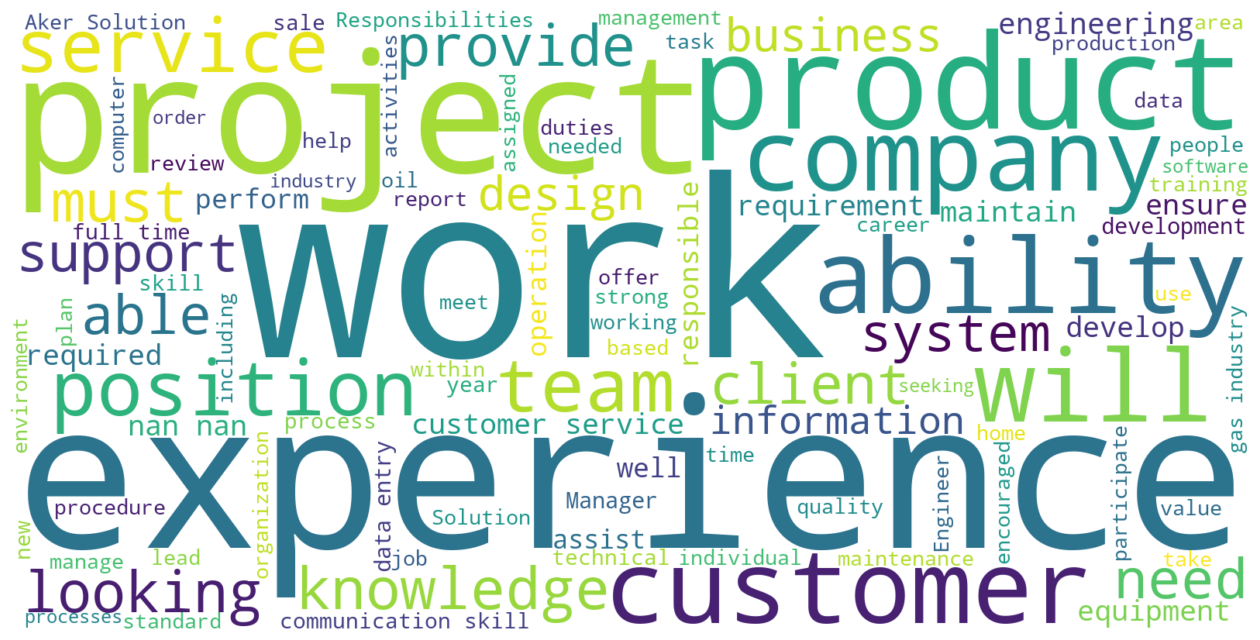

In [522]:
# Fake jobs wordcloud
plt.figure(figsize = (16,14))
wc = WordCloud(background_color='white', min_font_size = 3,  max_words = 100 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(fraudjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')
plt.axis('off')

(-0.5, 1599.5, 799.5, -0.5)

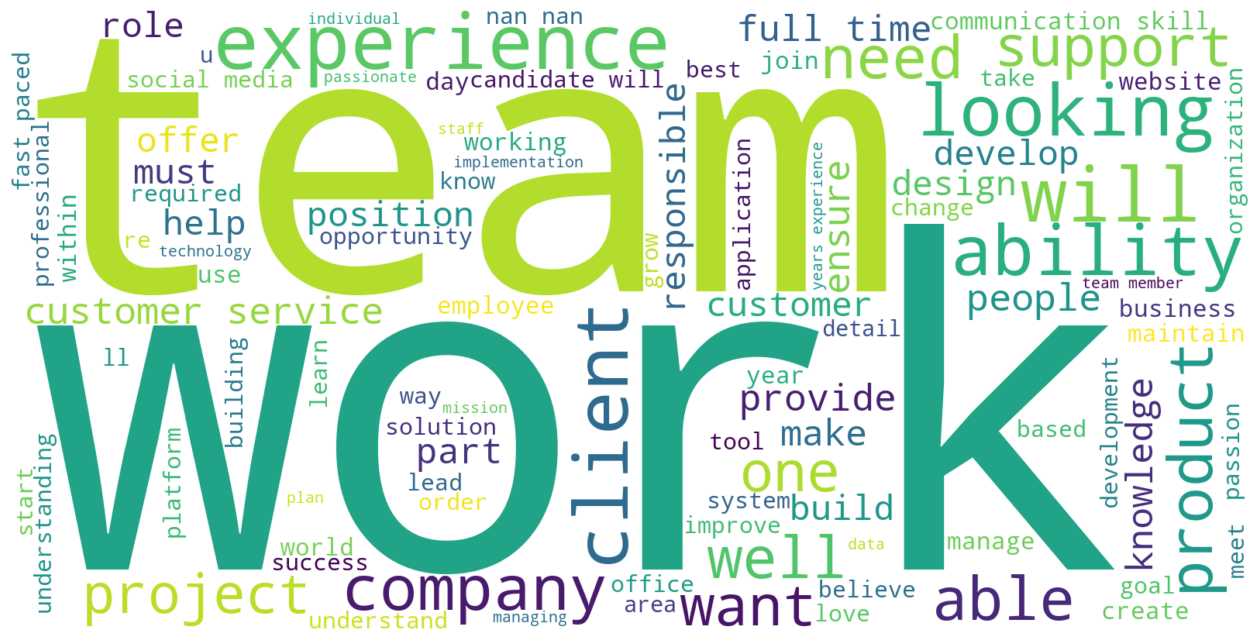

In [523]:
# Actual jobs wordcloud
plt.figure(figsize = (16,14))
wc = WordCloud(background_color='white', min_font_size = 3,  max_words = 100 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(actualjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')
plt.axis('off')

### Visualization of Location

In [525]:
def country_locater(location):
    place = location
    area = re.findall("\w+", place)
    return(area[0]+"_")
    
def state_locater(location):
    place = location
    area = re.findall("\w+", place)
    try:
        state = area[1]
    except:
        state = area[0]
    return(state)


unclean_posting[['location']] = unclean_posting[['location']].applymap(str)

unclean_posting["country"] = unclean_posting["location"].apply(lambda x : country_locater(x))

unclean_posting["state"] = unclean_posting["location"].apply(lambda x : state_locater(x))

Text(0.5, 1.0, 'Real Post')

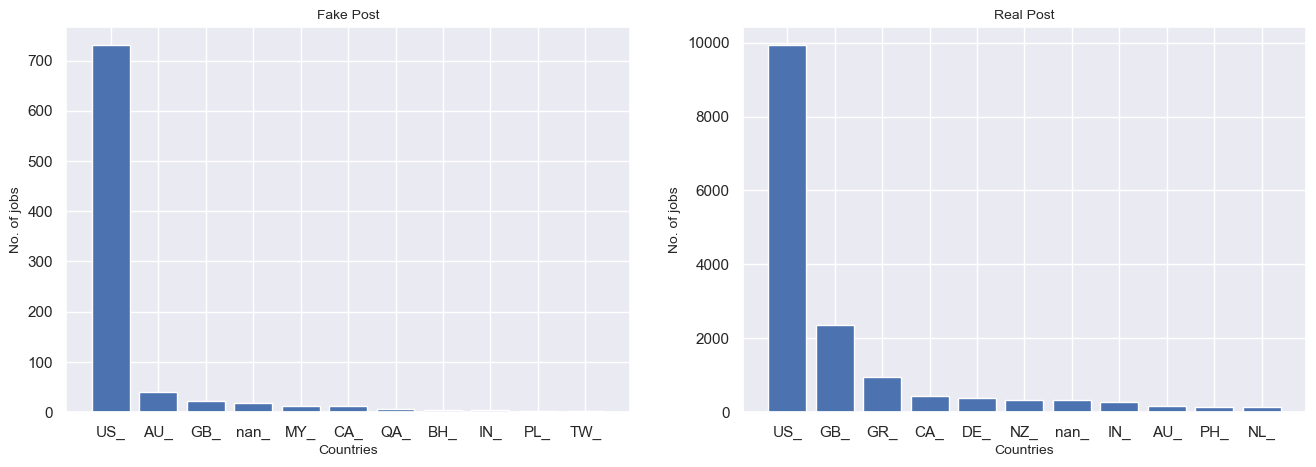

In [526]:
# Visualize job postings by countries
fcountry = dict(unclean_posting[unclean_posting['fraudulent'] == 1].country.value_counts()[:11])
rcountry = dict(unclean_posting[unclean_posting['fraudulent'] == 0].country.value_counts()[:11])

f, axes = plt.subplots(1,2, figsize=(16,5))

axes[0].bar(fcountry.keys(), fcountry.values())
axes[0].set_ylabel('No. of jobs', size=10)
axes[0].set_xlabel('Countries', size=10)
axes[0].set_title('Fake Post', size = 10)

axes[1].bar(rcountry.keys(), rcountry.values())
axes[1].set_ylabel('No. of jobs', size=10)
axes[1].set_xlabel('Countries', size=10)
axes[1].set_title('Real Post', size = 10)

Text(0.5, 1.0, 'Real Post')

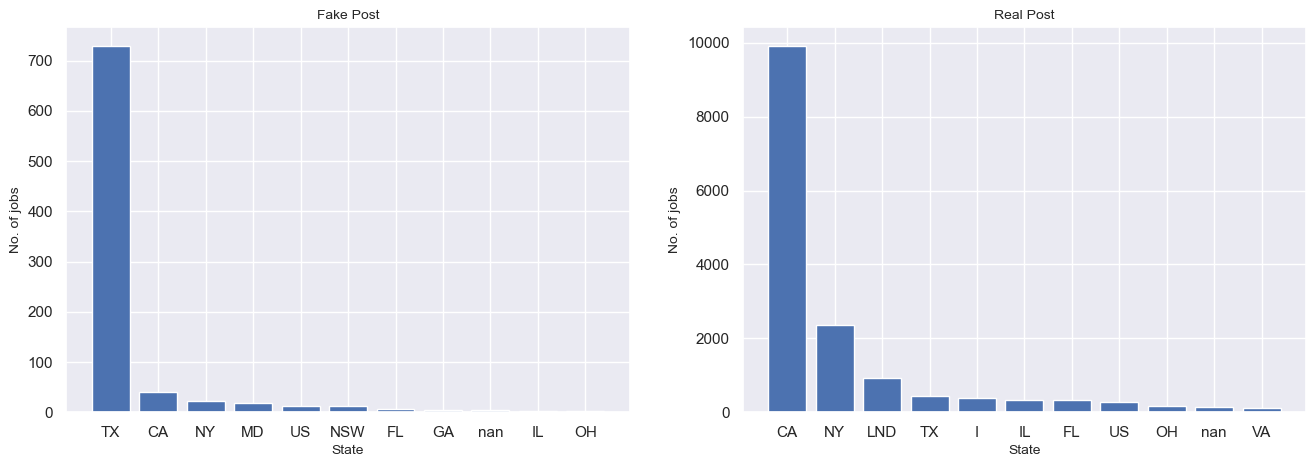

In [527]:
# Visualize job postings by states
fcity = dict(unclean_posting[unclean_posting['fraudulent'] == 1].state.value_counts()[:11])
rcity = dict(unclean_posting[unclean_posting['fraudulent'] == 0].state.value_counts()[:11])

f, axes = plt.subplots(1,2, figsize=(16,5))

axes[0].bar(fcity.keys(), fcountry.values())
axes[0].set_ylabel('No. of jobs', size=10)
axes[0].set_xlabel('State', size=10)
axes[0].set_title('Fake Post', size = 10)

axes[1].bar(rcity.keys(), rcountry.values())
axes[1].set_ylabel('No. of jobs', size=10)
axes[1].set_xlabel('State', size=10)
axes[1].set_title('Real Post', size = 10)

### Visualization of Number of Characters within Features containing Prose
- Company_Profile
- Description
- Requirements
- Benefits

In [529]:
# Extracting text features
text_df = unclean_posting[["title", "company_profile", "description", "requirements", "benefits","fraudulent"]]
text_df = text_df.fillna(' ')

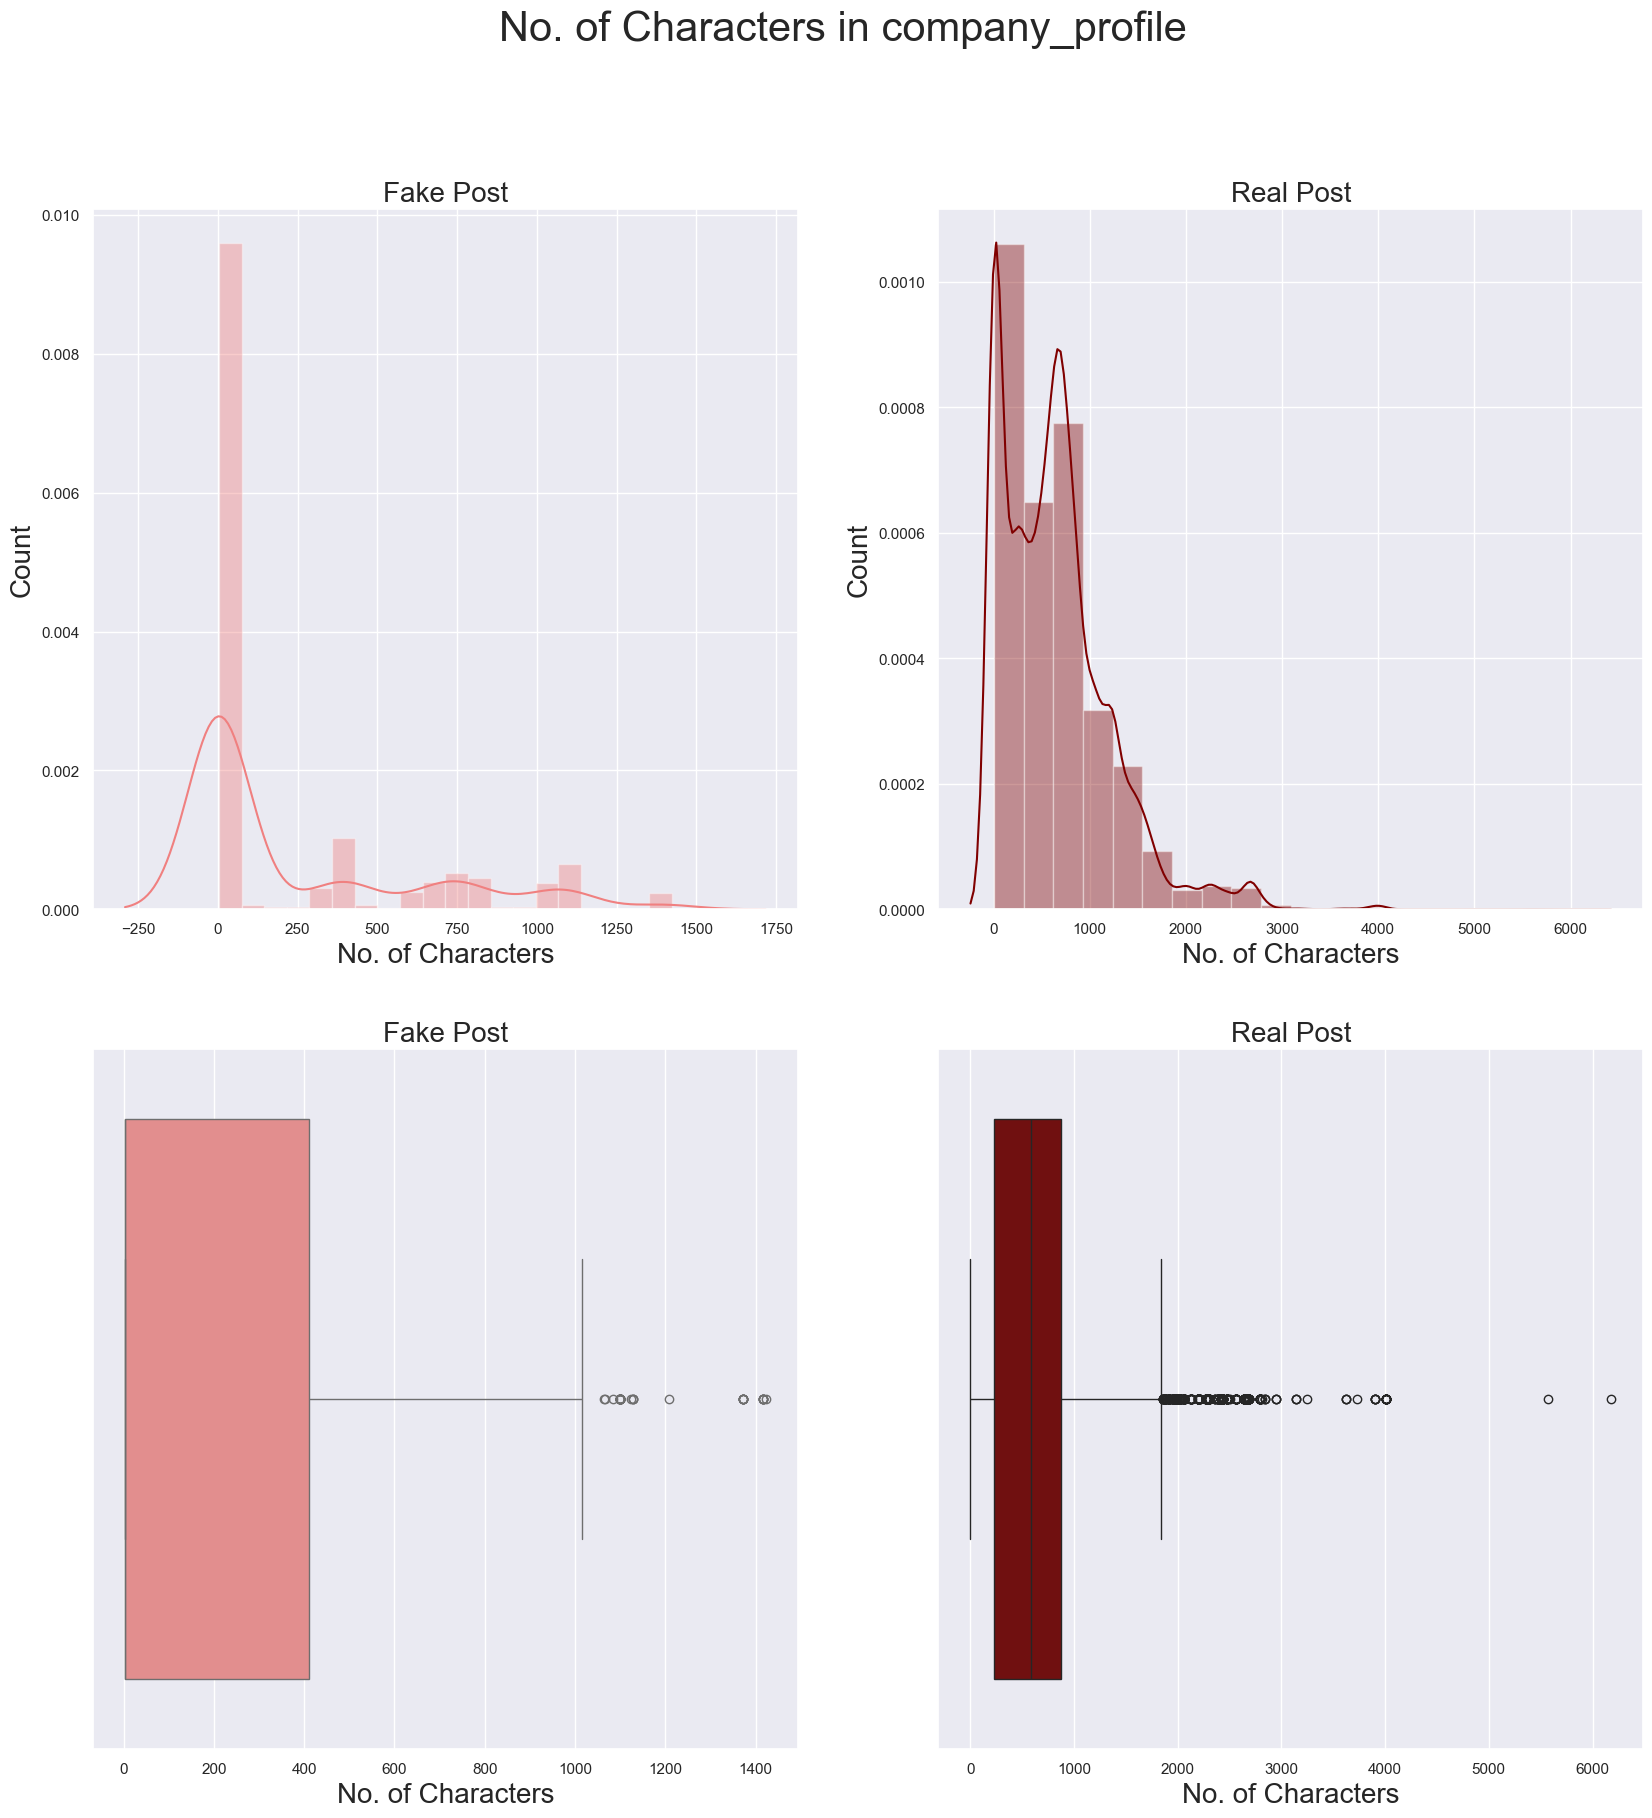

In [530]:
# Number of characters in real post and fake post for Company Profile
# Dist and Box plots
f, axes= plt.subplots(2,2, figsize=(20, 20), dpi=100)

length=text_df[text_df["fraudulent"]==1]['company_profile'].str.len()
sb.distplot(length,bins = 20,color='lightcoral', ax = axes[0,0])
axes[0,0].set_title('Fake Post', size = 20)

length=text_df[text_df["fraudulent"]==0]['company_profile'].str.len()
sb.distplot(length, bins = 20,color ='maroon', ax = axes[0,1])
axes[0,1].set_title('Real Post', size = 20)

length=text_df[text_df["fraudulent"]==1]['company_profile'].str.len()
sb.boxplot(length, orient = "h", ax = axes[1,0], color = 'lightcoral')
axes[1,0].set_title('Fake Post', size = 20)

length=text_df[text_df["fraudulent"]==0]['company_profile'].str.len()
sb.boxplot(length, orient = "h", ax = axes[1,1], color = 'maroon')
axes[1,1].set_title('Real Post', size = 20)

axes[0,0].set_xlabel('No. of Characters', size=20)
axes[0,1].set_xlabel('No. of Characters', size=20)
axes[0,0].set_ylabel('Count', size=20)
axes[0,1].set_ylabel('Count', size=20)

axes[1,0].set_xlabel('No. of Characters', size=20)
axes[1,1].set_xlabel('No. of Characters', size=20)

plt.suptitle('No. of Characters in company_profile', fontsize=30)
plt.show()

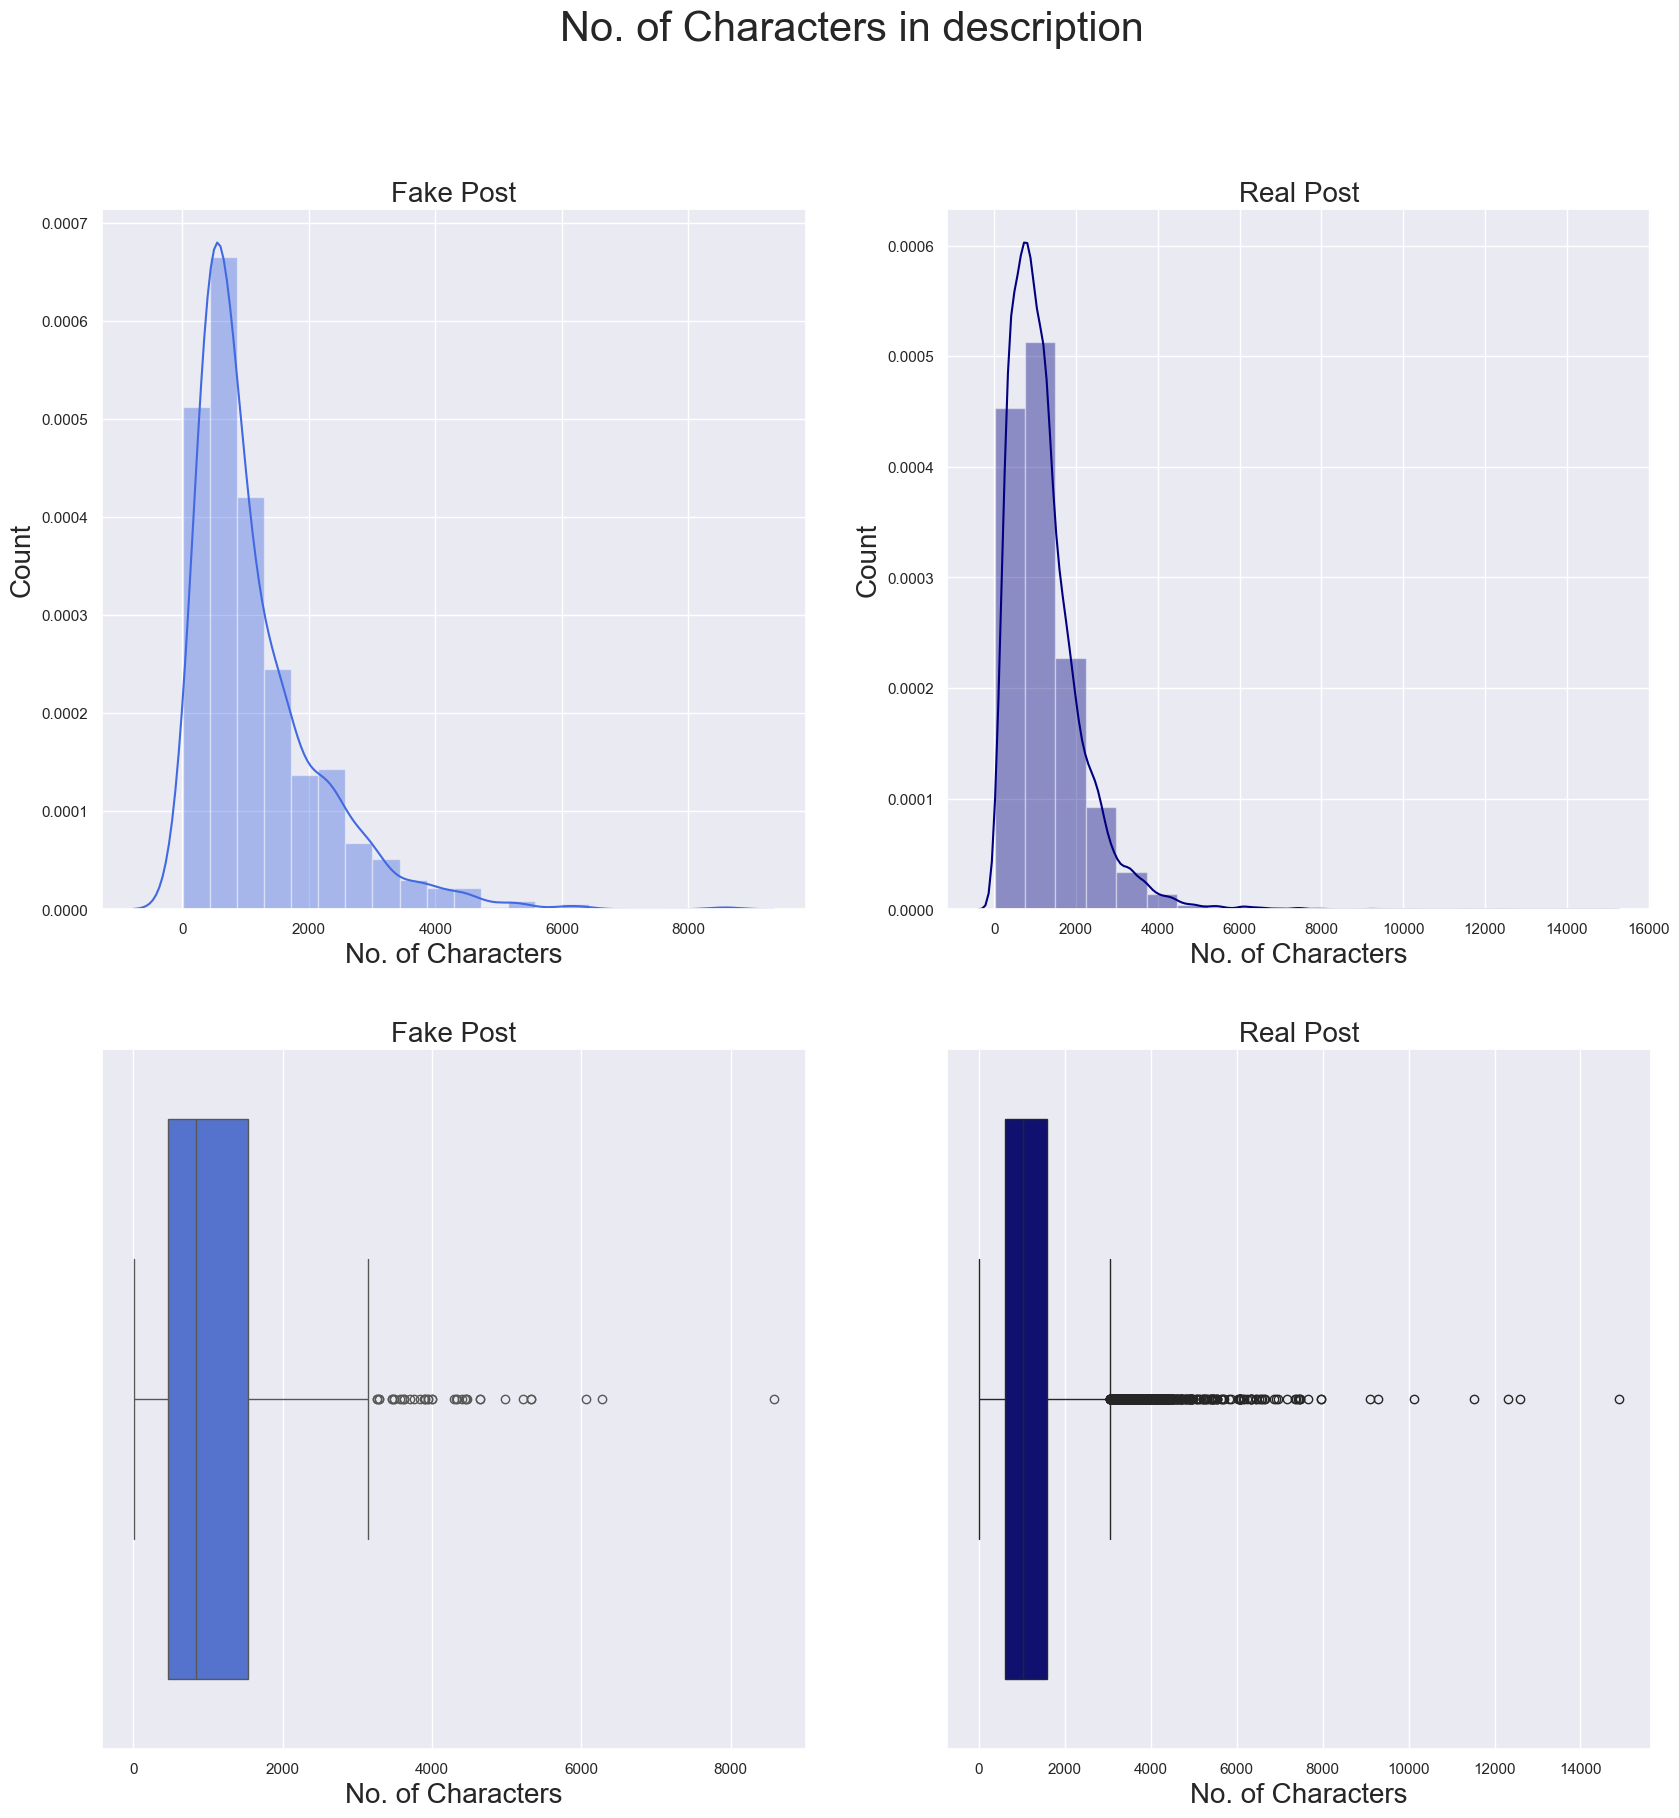

In [531]:
# Number of characters in real post and fake post for Company Profile
# Dist and Box plots
f, axes= plt.subplots(2,2, figsize=(20, 20), dpi=100)

length=text_df[text_df["fraudulent"]==1]['description'].str.len()
sb.distplot(length,bins = 20,color='royalblue', ax = axes[0,0])
axes[0,0].set_title('Fake Post', size = 20)

length=text_df[text_df["fraudulent"]==0]['description'].str.len()
sb.distplot(length, bins = 20,color ='navy', ax = axes[0,1])
axes[0,1].set_title('Real Post', size = 20)

length=text_df[text_df["fraudulent"]==1]['description'].str.len()
sb.boxplot(length, orient = "h", ax = axes[1,0], color = 'royalblue')
axes[1,0].set_title('Fake Post', size = 20)

length=text_df[text_df["fraudulent"]==0]['description'].str.len()
sb.boxplot(length, orient = "h", ax = axes[1,1], color = 'navy')
axes[1,1].set_title('Real Post', size = 20)

axes[0,0].set_xlabel('No. of Characters', size=20)
axes[0,1].set_xlabel('No. of Characters', size=20)
axes[0,0].set_ylabel('Count', size=20)
axes[0,1].set_ylabel('Count', size=20)

axes[1,0].set_xlabel('No. of Characters', size=20)
axes[1,1].set_xlabel('No. of Characters', size=20)

plt.suptitle('No. of Characters in description', fontsize=30)
plt.show()

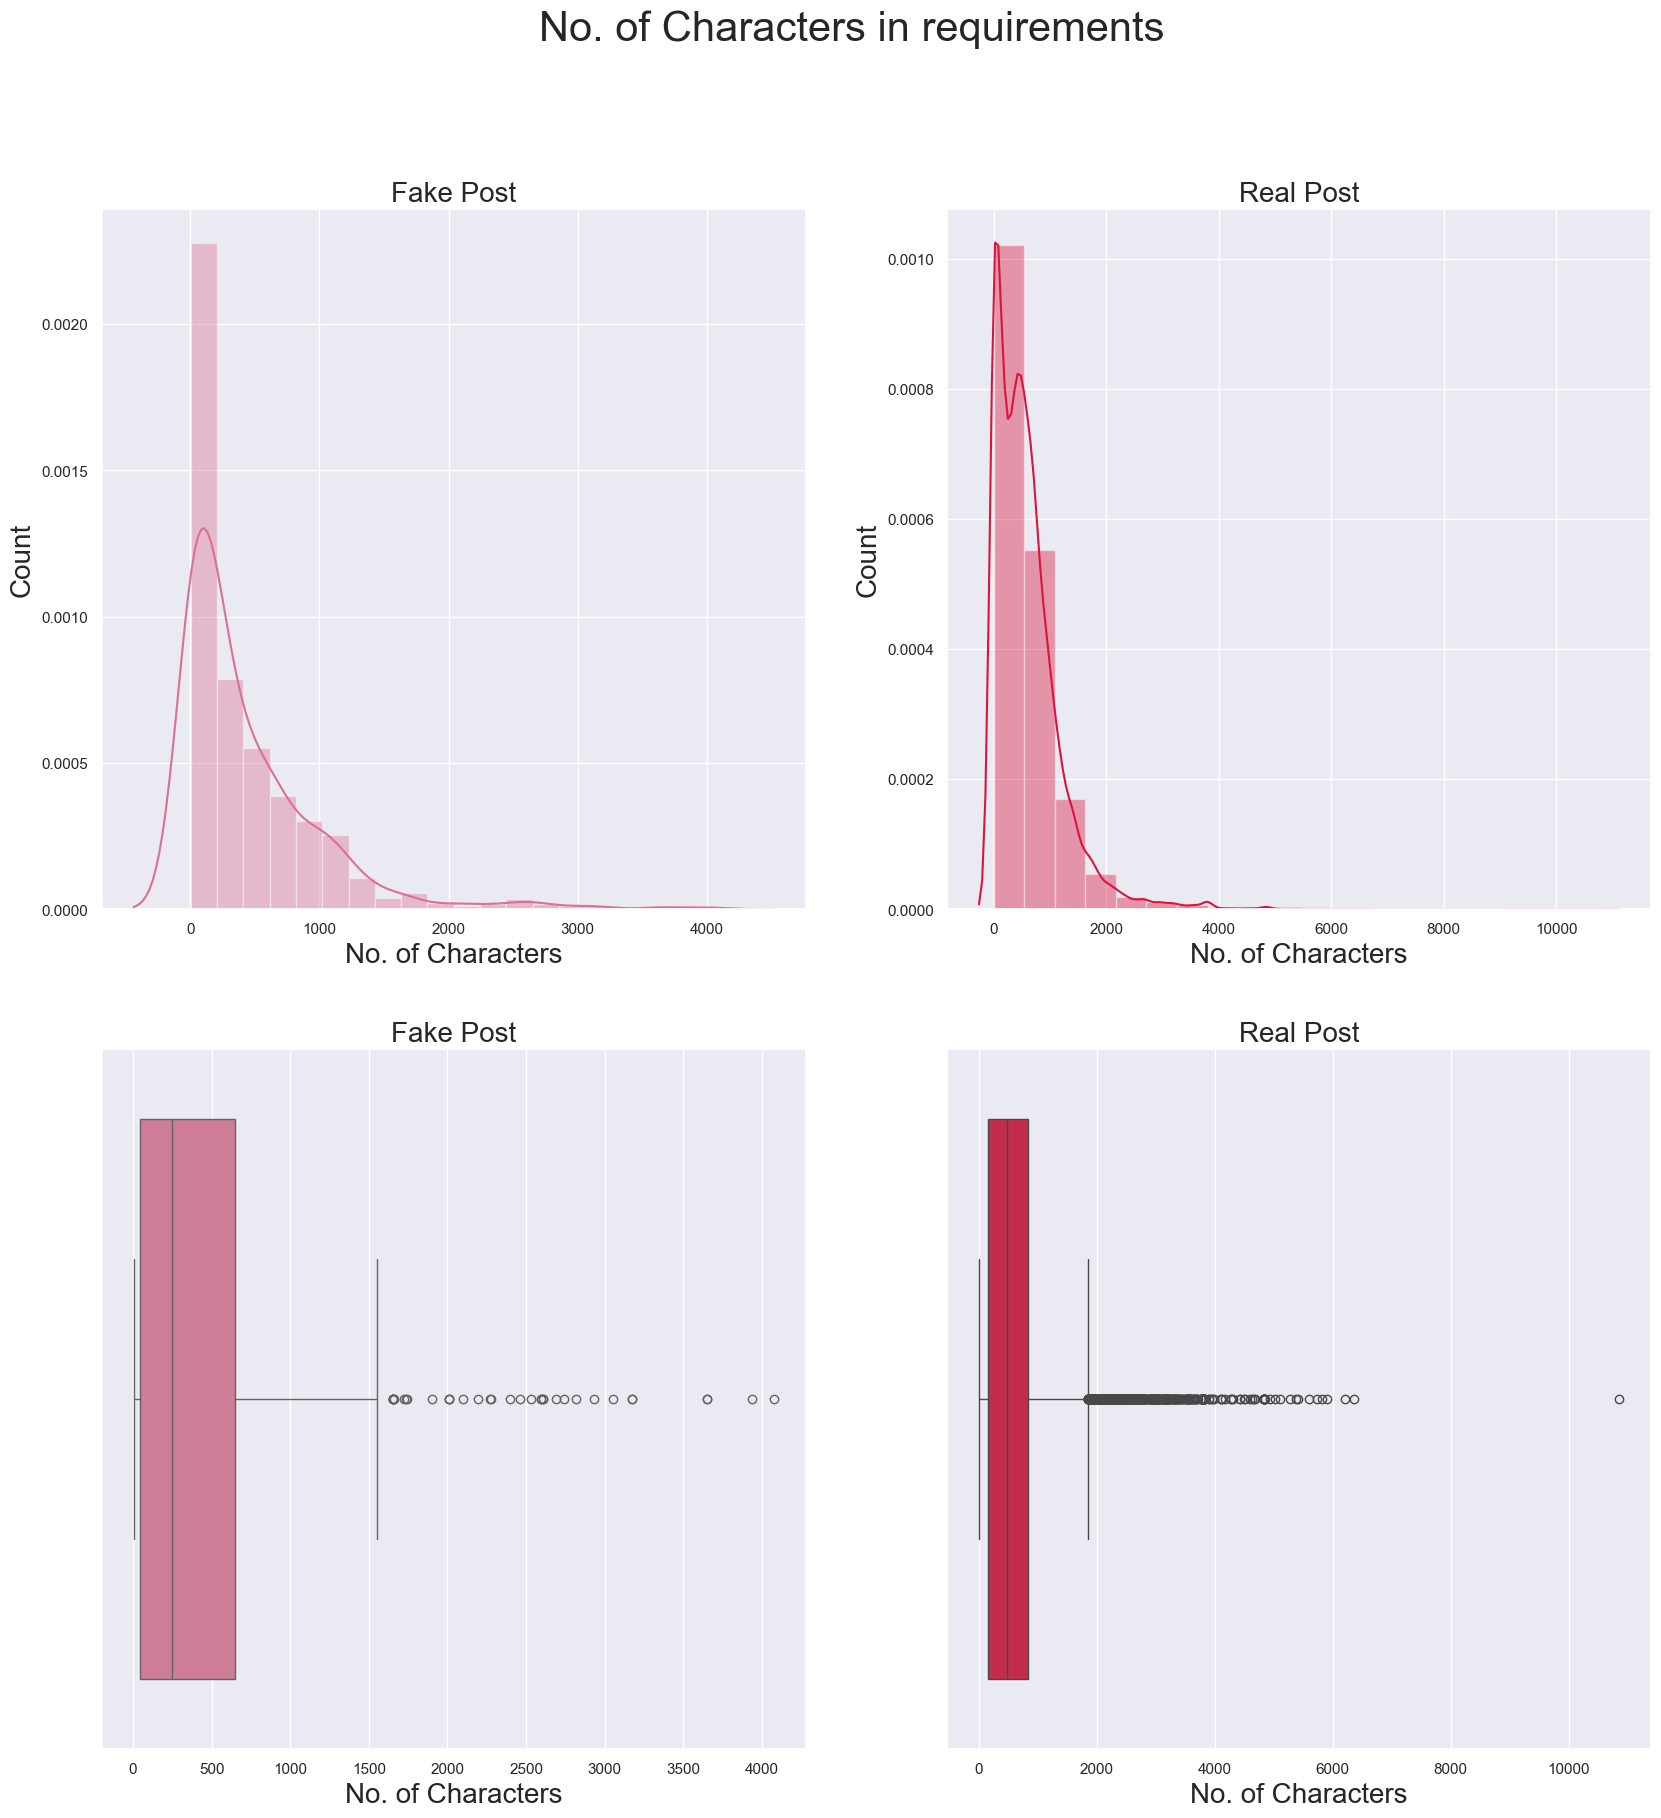

In [532]:
# Number of characters in real post and fake post for Company Profile
# Dist and Box plots
f, axes= plt.subplots(2,2, figsize=(20, 20), dpi=100)

length=text_df[text_df["fraudulent"]==1]['requirements'].str.len()
sb.distplot(length,bins = 20,color='palevioletred', ax = axes[0,0])
axes[0,0].set_title('Fake Post', size = 20)

length=text_df[text_df["fraudulent"]==0]['requirements'].str.len()
sb.distplot(length, bins = 20,color ='crimson', ax = axes[0,1])
axes[0,1].set_title('Real Post', size = 20)

length=text_df[text_df["fraudulent"]==1]['requirements'].str.len()
sb.boxplot(length, orient = "h", ax = axes[1,0], color = 'palevioletred')
axes[1,0].set_title('Fake Post', size = 20)

length=text_df[text_df["fraudulent"]==0]['requirements'].str.len()
sb.boxplot(length, orient = "h", ax = axes[1,1], color = 'crimson')
axes[1,1].set_title('Real Post', size = 20)

axes[0,0].set_xlabel('No. of Characters', size=20)
axes[0,1].set_xlabel('No. of Characters', size=20)
axes[0,0].set_ylabel('Count', size=20)
axes[0,1].set_ylabel('Count', size=20)

axes[1,0].set_xlabel('No. of Characters', size=20)
axes[1,1].set_xlabel('No. of Characters', size=20)

plt.suptitle('No. of Characters in requirements', fontsize=30)
plt.show()

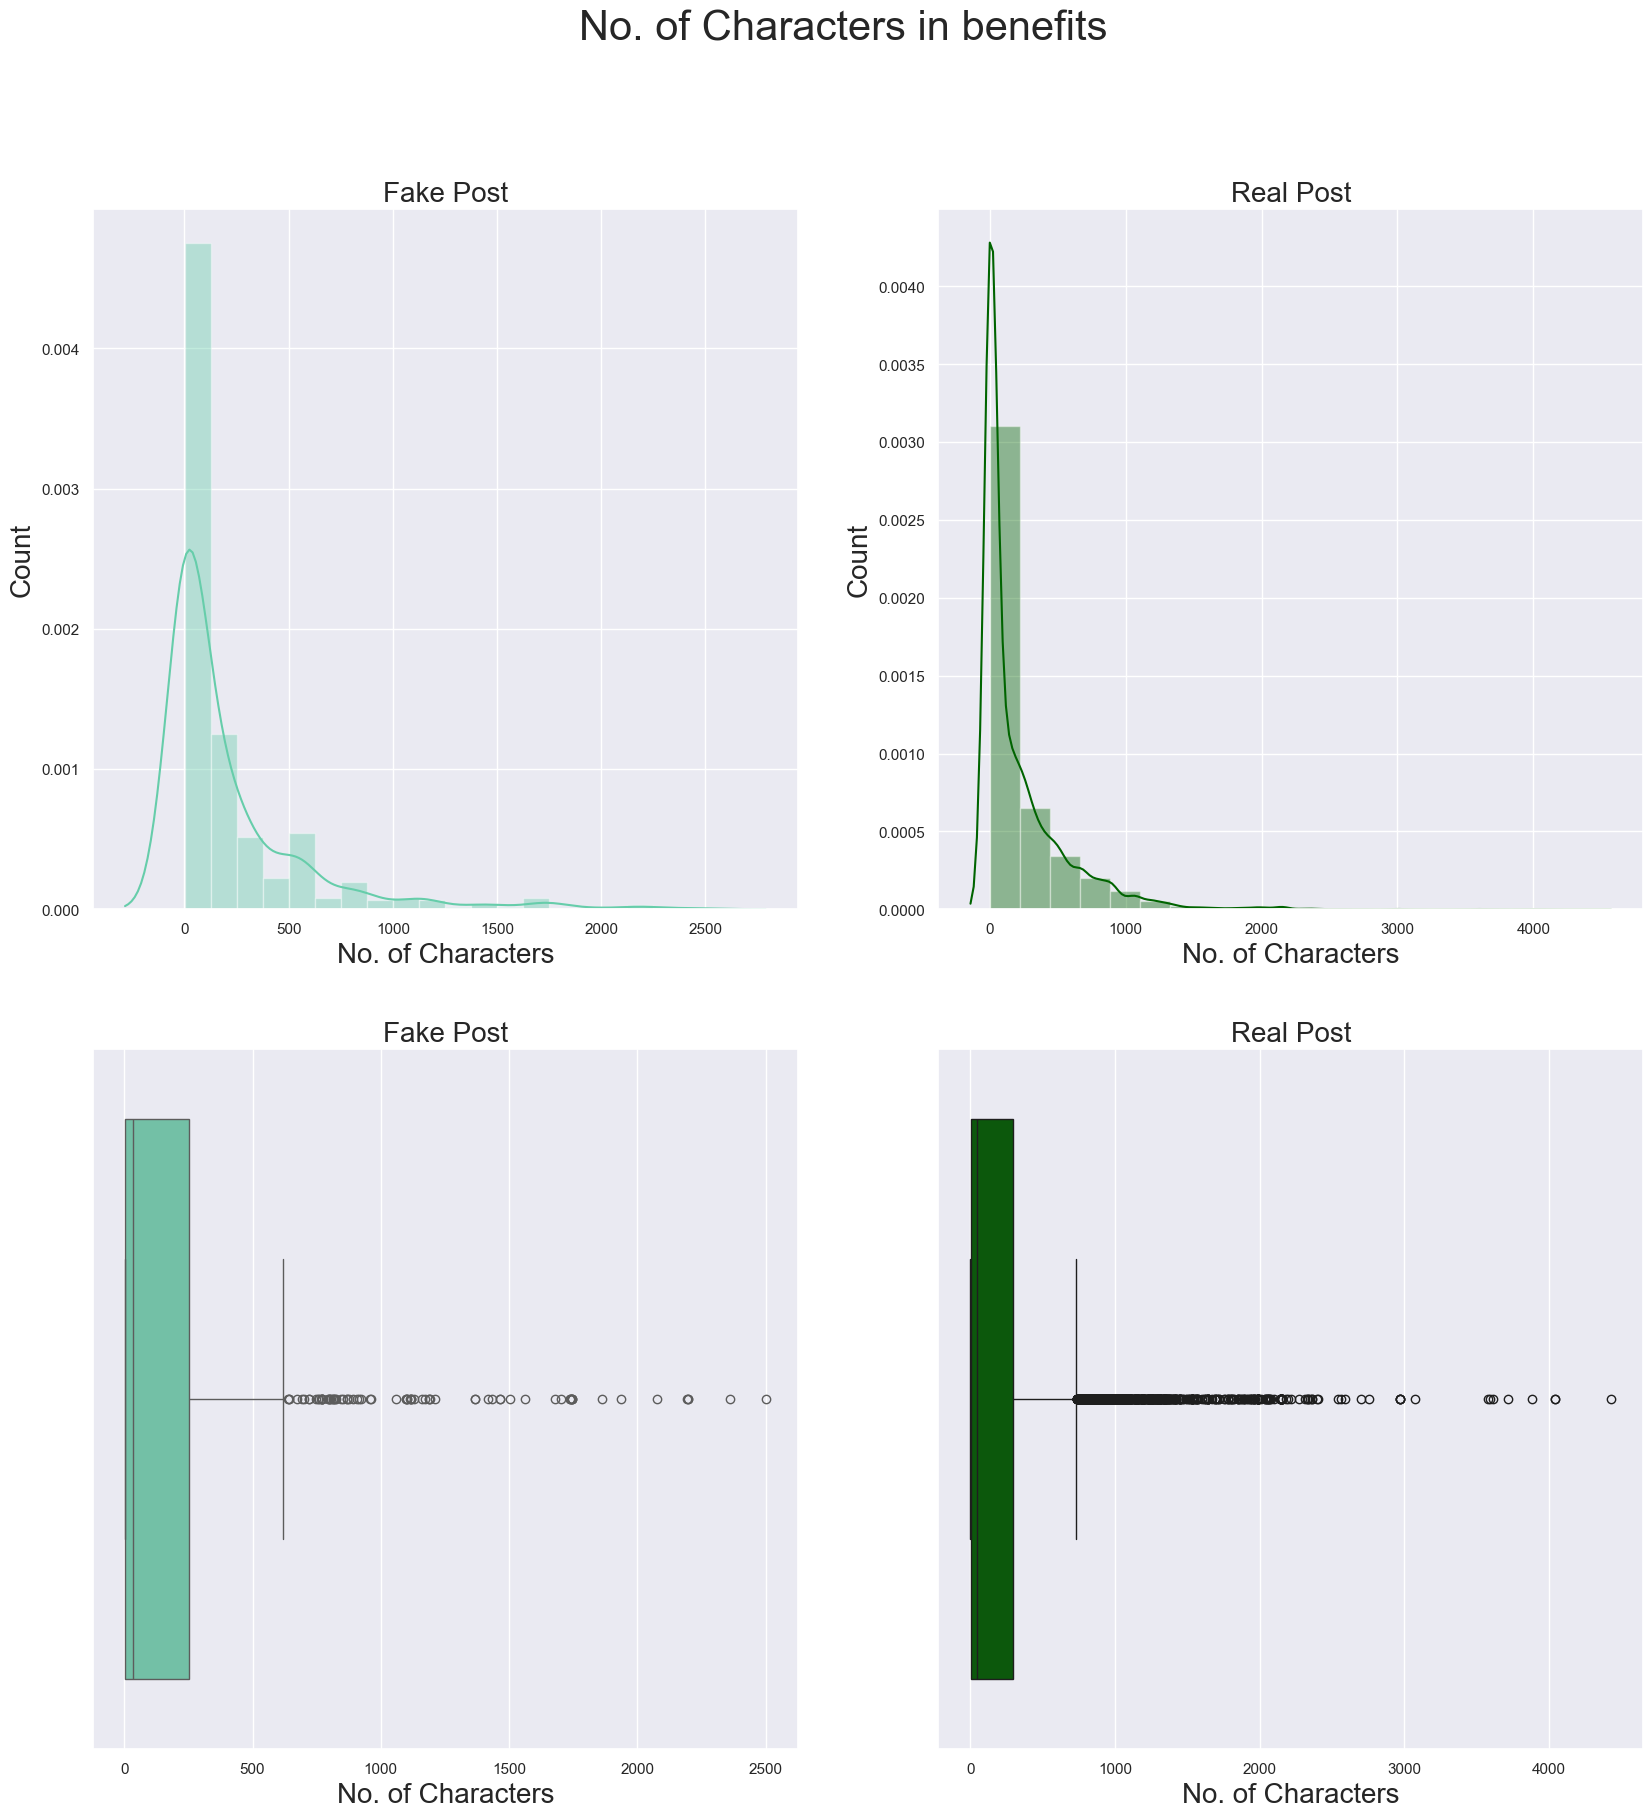

In [533]:
# Number of characters in real post and fake post for Company Profile
# Dist and Box plots
f, axes= plt.subplots(2,2, figsize=(20, 20), dpi=100)

length=text_df[text_df["fraudulent"]==1]['benefits'].str.len()
sb.distplot(length,bins = 20,color='mediumaquamarine', ax = axes[0,0])
axes[0,0].set_title('Fake Post', size = 20)

length=text_df[text_df["fraudulent"]==0]['benefits'].str.len()
sb.distplot(length, bins = 20,color ='darkgreen', ax = axes[0,1])
axes[0,1].set_title('Real Post', size = 20)

length=text_df[text_df["fraudulent"]==1]['benefits'].str.len()
sb.boxplot(length, orient = "h", ax = axes[1,0], color = 'mediumaquamarine')
axes[1,0].set_title('Fake Post', size = 20)

length=text_df[text_df["fraudulent"]==0]['benefits'].str.len()
sb.boxplot(length, orient = "h", ax = axes[1,1], color = 'darkgreen')
axes[1,1].set_title('Real Post', size = 20)

axes[0,0].set_xlabel('No. of Characters', size=20)
axes[0,1].set_xlabel('No. of Characters', size=20)
axes[0,0].set_ylabel('Count', size=20)
axes[0,1].set_ylabel('Count', size=20)

axes[1,0].set_xlabel('No. of Characters', size=20)
axes[1,1].set_xlabel('No. of Characters', size=20)

plt.suptitle('No. of Characters in benefits', fontsize=30)
plt.show()

In [660]:
# Overview of the dataset
print("Dataset Shape:", unclean_posting.shape)
print("\nColumn Data Types and Missing Values:")
print(unclean_posting.info())
print("\nSummary Statistics:")
print(unclean_posting.describe(include='all'))

# Transition Note for Part 2 & 3
print("\nBased on this analysis, we will now clean the dataset in Part 2 & 3 to handle missing values, standardize text data, and engineer features for anomaly detection.")

Dataset Shape: (17880, 19)

Column Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      17880 non-null  object
 6   description          17880 non-null  object
 7   requirements         17880 non-null  object
 8   benefits             17880 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null  

## Investigation 

In [536]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sb
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [537]:
filepath = "fake_job_postings.csv.zip"
unclean_posting = pd.read_csv(filepath)
unclean_posting.head(3)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


In [538]:
unclean_posting[unclean_posting["fraudulent"]==1].head(3)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
98,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
144,145,Forward Cap.,NaN,NaN,NaN,NaN,The group has raised a fund for the purchase o...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1
173,174,Technician Instrument & Controls,US,Power Plant & Energy,NaN,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",0,1,1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1


### Comparison of Prose between Fake & Real Job Postings
#### Sample of Fraudulent Posting's Features

In [540]:
unclean_posting.iloc[98]

job_id                                                                99
title                                                    IC&E Technician
location                                               US, , Stocton, CA
department                                                  Oil & Energy
salary_range                                                95000-115000
company_profile                                                      ...
description            IC&amp;E Technician | Bakersfield, CA Mt. Poso...
requirements           QualificationsKnowledge, Skills &amp; Abilitie...
benefits               BENEFITSWhat is offered:Competitive compensati...
telecommuting                                                          0
has_company_logo                                                       1
has_questions                                                          1
employment_type                                                Full-time
required_experience                                

In [541]:
unclean_posting.iloc[98].company_profile

"\xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0Staffing &amp; Recruiting done right for the Oil &amp; Energy Industry!Represented candidates are automatically granted the following perks: Expert negotiations on your behalf, maximizing your compensation package and implimenting ongoing increases\xa0Significant signing bonus by Refined Resources (in addition to any potential signing bonuses our client companies offer)1 Year access to AnyPerk: significant corporate discounts on cell phones, event tickets, house cleaning and everything inbetween. \xa0You'll save thousands on daily expenditures\xa0Professional Relocation Services for out of town candidates* All candidates are encouraged to participate in our Referral Bonus Program ranging anywhere from $500 - $1,000 for all successfully hired candidates... referred directly to the Refi

In [542]:
unclean_posting.iloc[98].description

'IC&amp;E Technician | Bakersfield, CA Mt. PosoPrincipal Duties and Responsibilities:\xa0Calibrates, tests, maintains, troubleshoots, and installs all power plant instrumentation, control systems and electrical equipment.Performs maintenance on motor control centers, motor operated valves, generators, excitation equipment and motors.Performs preventive, predictive and corrective maintenance on equipment, coordinating work with various team members.Designs and installs new equipment and/or system modifications.Troubleshoots and performs maintenance on DC backup power equipment, process controls, programmable logic controls (PLC), and emission monitoring equipment.Uses maintenance reporting system to record time and material use, problem identified and corrected, and further action required; provides complete history of maintenance on equipment.Schedule, coordinate, work with and monitor contractors on specific tasks, as required.Follows safe working practices at all times.Identifies saf

### Sample of Non-Fraudulent Posting's Features

In [544]:
unclean_posting.iloc[1]

job_id                                                                 2
title                          Customer Service - Cloud Video Production
location                                                  NZ, , Auckland
department                                                       Success
salary_range                                                         NaN
company_profile        90 Seconds, the worlds Cloud Video Production ...
description            Organised - Focused - Vibrant - Awesome!Do you...
requirements           What we expect from you:Your key responsibilit...
benefits               What you will get from usThrough being part of...
telecommuting                                                          0
has_company_logo                                                       1
has_questions                                                          0
employment_type                                                Full-time
required_experience                                

In [545]:
unclean_posting.iloc[1].company_profile

'90 Seconds, the worlds Cloud Video Production Service.90 Seconds is the worlds Cloud Video Production Service enabling brands and agencies to get high quality online video content shot and produced anywhere in the world. 90 Seconds makes video production fast, affordable, and all managed seamlessly in the cloud from purchase to publish. http://90#URL_fbe6559afac620a3cd2c22281f7b8d0eef56a73e3d9a311e2f1ca13d081dd630#90 Seconds removes the hassle, cost, risk and speed issues of working with regular video production companies by managing every aspect of video projects in a beautiful online experience. With a growing global network of over 2,000 rated video professionals in over 50 countries managed by dedicated production success teams in 5 countries, 90 Seconds provides a 100% success guarantee.90 Seconds has produced almost 4,000 videos in over 30 Countries for over 500 Global brands including some of the worlds largest including Paypal, L’Oreal, Sony and Barclays and has offices in Auc

In [546]:
unclean_posting.iloc[1].description

"Organised - Focused - Vibrant - Awesome!Do you have a passion for customer service? Slick typing skills? Maybe Account Management? ...And think administration is cooler than a polar bear on a jetski? Then we need to hear you!\xa0We are the Cloud Video Production Service and opperating on a glodal level. Yeah, it's pretty cool. Serious about\xa0delivering a world class product and excellent customer service.Our rapidly expanding business is looking for a talented Project Manager to manage the successful delivery of video projects, manage client communications and drive the production process. Work with some of the coolest brands on the planet and learn from a global team that are representing NZ is a huge way!We are entering the next growth stage of our business and growing quickly internationally. \xa0Therefore, the position is bursting with opportunity for the right person entering the business at the right time.\xa090 Seconds, the worlds Cloud Video Production Service -\xa0http://90

### Handle Missing Values

Initial Dataset Shape: (17880, 21)
Initial Missing Values:
job_id                     0
title                      0
location                   0
department             11547
salary_range           15012
company_profile            0
description                0
requirements               0
benefits                   0
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
text                       0
country                    0
state                      0
dtype: int64


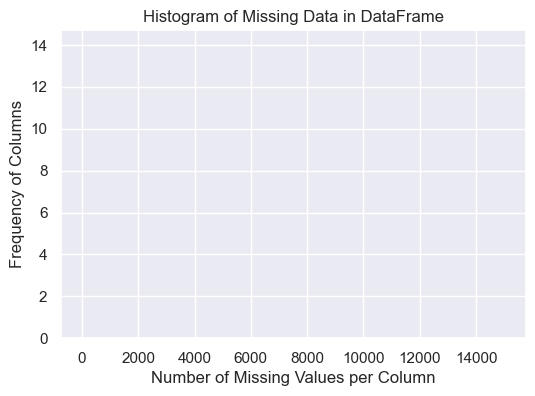

In [548]:
print("Initial Dataset Shape:", df.shape)
print("Initial Missing Values:")
print(df.isnull().sum())

# Count missing values per column
missing_counts = df.isnull().sum()

# Plot histogram
plt.figure(figsize=(6, 4))
sb.histplot(missing_counts, bins=range(0, max(missing_counts) + 2), kde=False, color="darkred")

# Labels and title
plt.xlabel("Number of Missing Values per Column")
plt.ylabel("Frequency of Columns")
plt.title("Histogram of Missing Data in DataFrame")

# Show plot
plt.show()

In [549]:
# Ensure 'department' column exists before processing
if "department" in df.columns:
    df.loc[:, "department"] = df["department"].fillna("Unknown")
else:
    print("Warning: 'department' column not found in dataset.")

In [665]:
# Process 'salary_range' by extracting min/max salary
if "salary_range" in df.columns and df["salary_range"].notna().sum() > 0:
    df["salary_range"] = df["salary_range"].astype(str)
    salary_split = df["salary_range"].str.split('-', expand=True)
    df.loc[:, "salary_min"] = pd.to_numeric(salary_split[0], errors='coerce')
    df.loc[:, "salary_max"] = pd.to_numeric(salary_split[1], errors='coerce') if salary_split.shape[1] > 1 else df["salary_min"]
    
    df.loc[:, "salary_min"] = df["salary_min"].fillna(df["salary_min"].median())
    df.loc[:, "salary_max"] = df["salary_max"].fillna(df["salary_max"].median())
    
    df.drop(columns=["salary_range"], inplace=True)
else:
    print("Note: 'salary_range' column contains no usable data; salary processing skipped.")

Original dataset size: 17880
After outlier removal: 15202


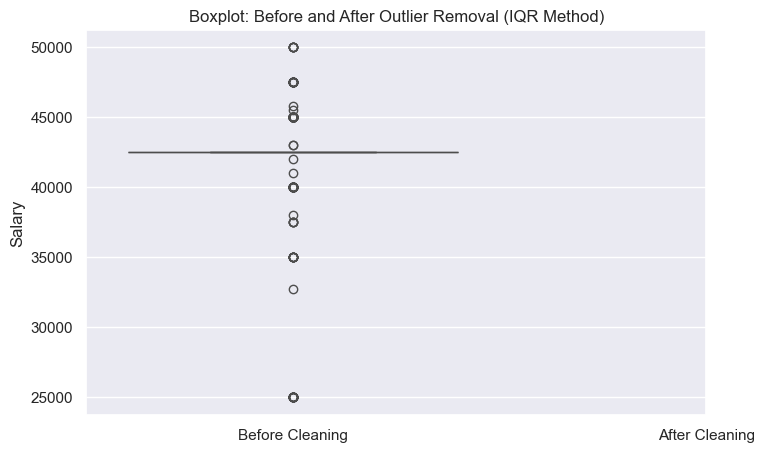

In [551]:
# Outlier Handling using IQR method
num_cols = ["salary_min", "salary_max"]
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df_cleaned = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]

print("Original dataset size:", df.shape[0])
print("After outlier removal:", df_cleaned.shape[0])

df["Salary"] = (df["salary_min"] + df["salary_max"]) / 2
df_cleaned["Salary"] = (df_cleaned["salary_min"] + df_cleaned["salary_max"]) / 2


# Create side-by-side boxplots
plt.figure(figsize=(8, 5))
sb.boxplot(data=[df["Salary"], df_cleaned["Salary"]], palette=["red", "green"])

# Labels and titles
plt.xticks([0, 1], ["Before Cleaning", "After Cleaning"])
plt.ylabel("Salary")
plt.title("Boxplot: Before and After Outlier Removal (IQR Method)")

# Show plot
plt.show()

## Final Cleaning

In [553]:
# Normalize Numerical Data
scaler = StandardScaler()
df[['salary_min', 'salary_max']] = scaler.fit_transform(df[['salary_min', 'salary_max']])

In [554]:
# Encode Categorical Variables
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
categorical_cols = ["employment_type", "required_experience", "required_education", "industry", "function"]
categorical_encoded = encoder.fit_transform(df[categorical_cols])
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_cols))
df = df.drop(columns=categorical_cols).join(categorical_encoded_df)

In [555]:
# Ensure no NaNs remain after encoding
df.fillna(0, inplace=True)

# Feature Engineering

In [673]:
# Generate new numerical features
df["num_categorical_features"] = df.select_dtypes(include=['uint8']).sum(axis=1)  # Count encoded categorical features
df["salary_range"] = df["salary_max"] - df["salary_min"]  # Compute salary range
df["has_salary_info"] = df[["salary_min", "salary_max"]].notna().all(axis=1).astype(int)  # 1 if both salaries exist

In [675]:
# Convert Boolean Columns to Numerical (0/1)
bool_cols = ["telecommuting", "has_company_logo", "has_questions"]
for col in bool_cols:
    if col in df.columns:
        df[col] = df[col].astype(int)


### Feature Engineering Validation ###

Checking for missing values in engineered features:
num_categorical_features    0
salary_range                0
has_salary_info             0
telecommuting               0
has_company_logo            0
has_questions               0
dtype: int64

Summary Statistics for Engineered Features:
       num_categorical_features  salary_range  has_salary_info  telecommuting  \
count                   17880.0  17880.000000          17880.0   17880.000000   
mean                        0.0      0.012586              1.0       0.042897   
std                         0.0      0.270610              0.0       0.202631   
min                         0.0     -3.289273              1.0       0.000000   
25%                         0.0     -0.001111              1.0       0.000000   
50%                         0.0     -0.001111              1.0       0.000000   
75%                         0.0     -0.001111              1.0       0.000000   
max                  

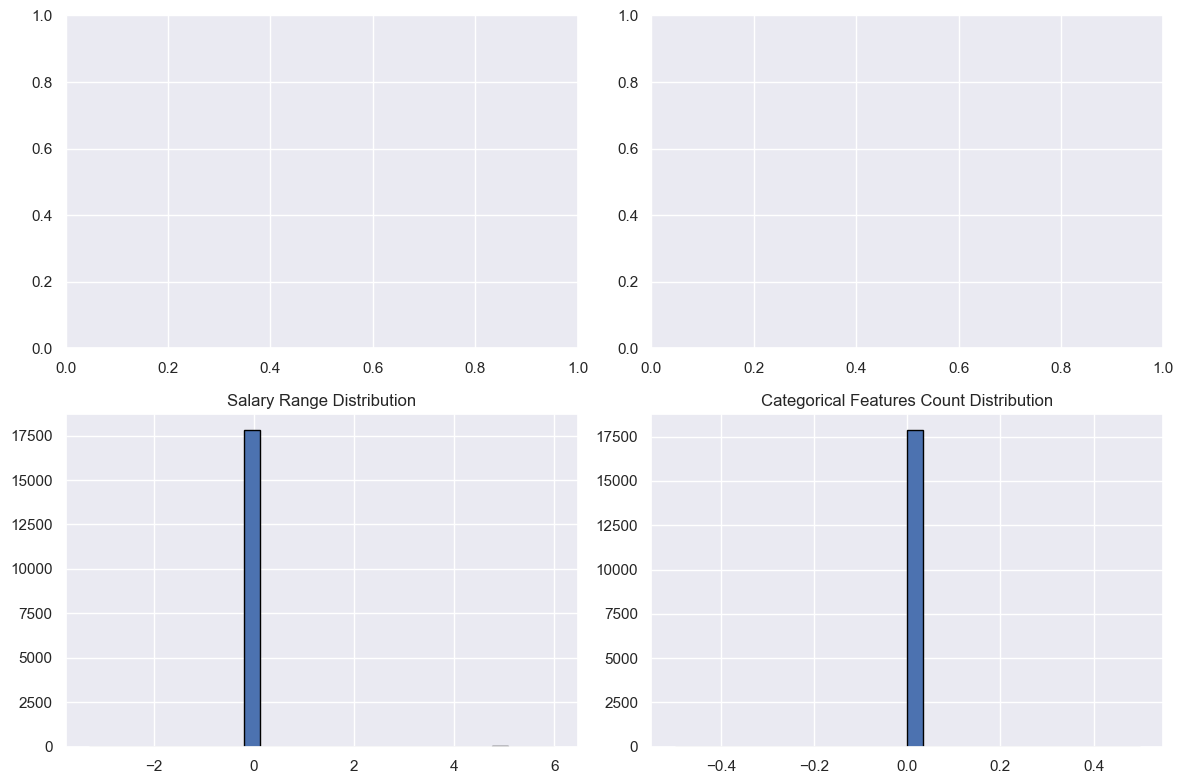

In [677]:
# Validate Feature Engineering
feature_cols = ["num_categorical_features", "salary_range", "has_salary_info"] + bool_cols
print("\n### Feature Engineering Validation ###\n")
print("Checking for missing values in engineered features:")
print(df[feature_cols].isnull().sum())

print("\nSummary Statistics for Engineered Features:")
print(df[feature_cols].describe())
from sklearn.preprocessing import LabelEncoder

# ✅ Check if Categorical Columns Exist Before Encoding
categorical_features = ["employment_type", "required_experience", "required_education", "industry", "function"]
existing_categorical_features = [col for col in categorical_features if col in df.columns]

for col in existing_categorical_features:
    df[col] = LabelEncoder().fit_transform(df[col])

# ✅ Improve Feature Visualization for Better Readability
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

if "description_len" in df.columns:
    df["description_len"].hist(ax=axes[0, 0], bins=30, edgecolor='black')
    axes[0, 0].set_title("Description Length Distribution")

if "requirements_len" in df.columns:
    df["requirements_len"].hist(ax=axes[0, 1], bins=30, edgecolor='black')
    axes[0, 1].set_title("Requirements Length Distribution")

if "salary_range" in df.columns:
    df["salary_range"].hist(ax=axes[1, 0], bins=30, edgecolor='black')
    axes[1, 0].set_title("Salary Range Distribution")

if "num_categorical_features" in df.columns:
    df["num_categorical_features"].hist(ax=axes[1, 1], bins=30, edgecolor='black')
    axes[1, 1].set_title("Categorical Features Count Distribution")

plt.tight_layout()
plt.show()

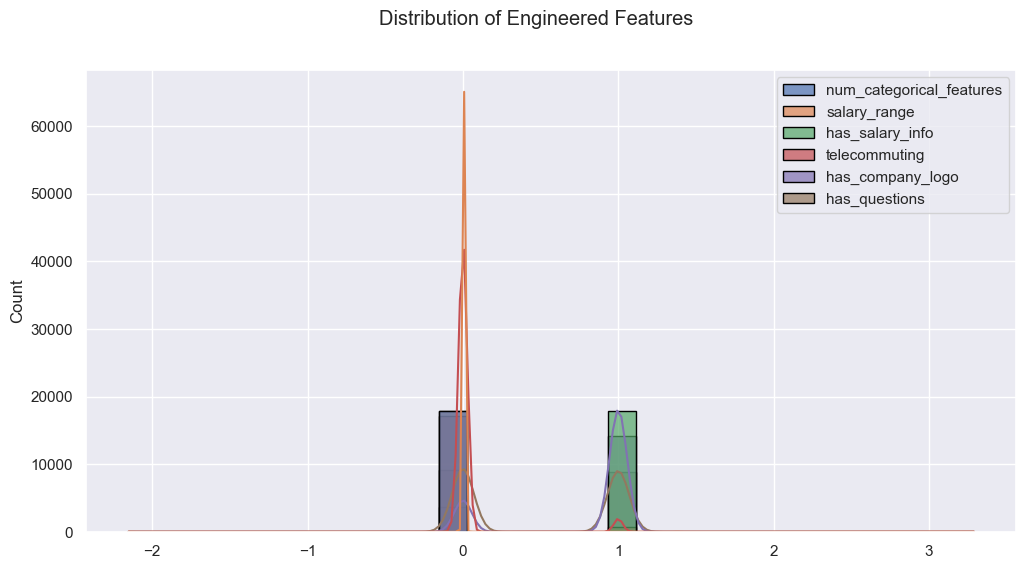

In [560]:
# Visualizing the Engineered Features
plt.figure(figsize=(12, 6))
sb.histplot(data=df[feature_cols], kde=True, bins=30, alpha=0.7, edgecolor='black')
plt.suptitle("Distribution of Engineered Features")
plt.show()

In [561]:
# Save Cleaned Data
cleaned_file = "investigative_postings_cleaned.csv"
df.to_csv(cleaned_file, index=False)

In [562]:
print("Final Dataset Shape:", df.shape)
print(f"Cleaned dataset saved as {cleaned_file}")

Final Dataset Shape: (17880, 219)
Cleaned dataset saved as investigative_postings_cleaned.csv


# Modeling with Isolation Forest

In [683]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the Cleaned Dataset
df = pd.read_csv('investigative_postings_cleaned.csv')

# Define Numerical & Categorical Columns
numerical_cols = ['salary_min', 'salary_max']
categorical_cols = ["employment_type", "required_experience", "required_education", "industry", "function"]
bool_cols = ["telecommuting", "has_company_logo", "has_questions"]

# Check for the Existence of Categorical Columns
existing_categorical_cols = [col for col in categorical_cols if col in df.columns]

# Define Preprocessing Steps
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Apply Preprocessing to Categorical Columns Separately
categorical_encoded = categorical_transformer.fit_transform(df[existing_categorical_cols])
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=categorical_transformer.get_feature_names_out(existing_categorical_cols))

# Apply Preprocessing to Numerical Columns
numerical_transformed = numerical_transformer.fit_transform(df[numerical_cols])
numerical_transformed_df = pd.DataFrame(numerical_transformed, columns=numerical_cols)

# Combine Numerical & Categorical Data
df_preprocessed = pd.concat([numerical_transformed_df, categorical_encoded_df], axis=1)

# Ensure No NaNs Remain
df_preprocessed.fillna(0, inplace=True)

# Generate New Numerical Features
df_preprocessed["num_categorical_features"] = df_preprocessed.select_dtypes(include=['float64']).sum(axis=1)
df_preprocessed["salary_range"] = df_preprocessed["salary_max"] - df_preprocessed["salary_min"]
df_preprocessed["has_salary_info"] = df_preprocessed[["salary_min", "salary_max"]].notna().all(axis=1).astype(int)

# Convert Boolean Columns to Numerical (0/1)
for col in bool_cols:
    if col in df.columns:
        df_preprocessed[col] = df[col].astype(int)

# Initialize the Isolation Forest Model
model = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)

# Fit the Model on the Dataset
model.fit(df_preprocessed)

# Generate Anomaly Scores
df_preprocessed['anomaly_score'] = model.decision_function(df_preprocessed)

# Predict Anomalies
df_preprocessed['anomaly'] = model.predict(df_preprocessed.drop(columns=['anomaly_score']))

# Flag Potential Fraudulent Listings
df_preprocessed['is_fraud'] = df_preprocessed['anomaly'].apply(lambda x: 1 if x == -1 else 0)

# Save the Results
df_preprocessed.to_csv('investigative_postings_with_anomaly_scores.csv', index=False)
print("Modeling complete. Results saved as 'investigative_postings_with_anomaly_scores.csv'.")

Modeling complete. Results saved as 'investigative_postings_with_anomaly_scores.csv'.


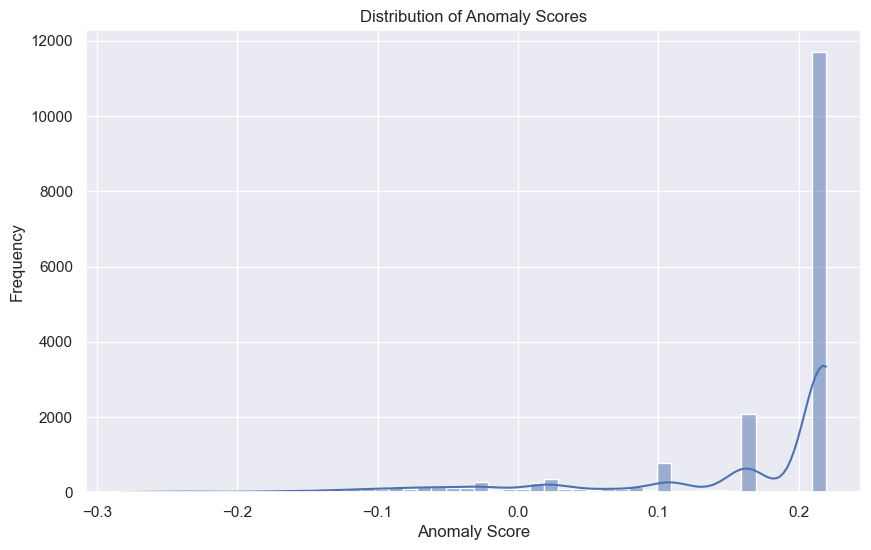

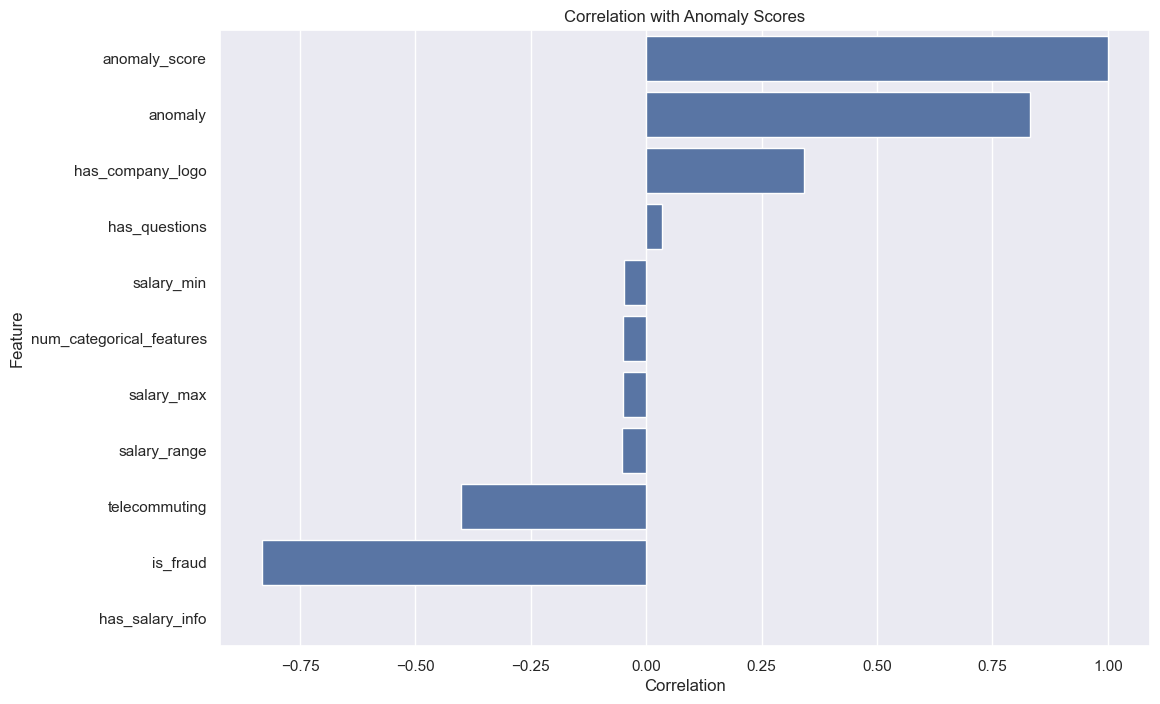

High-scoring postings for manual validation:
Empty DataFrame
Columns: [salary_min, salary_max, num_categorical_features, salary_range, has_salary_info, telecommuting, has_company_logo, has_questions, anomaly_score, anomaly, is_fraud]
Index: []
Refinement complete. Refined results saved as 'investigative_postings_with_refined_anomaly_scores.csv'.


In [685]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.ensemble import IsolationForest

# Load the Dataset with Anomaly Scores
df_preprocessed = pd.read_csv('investigative_postings_with_anomaly_scores.csv')

# Analyze Anomaly Scores
plt.figure(figsize=(10, 6))
sb.histplot(df_preprocessed['anomaly_score'], bins=50, kde=True)
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()

# Correlation Analysis with Anomaly Scores
correlation_matrix = df_preprocessed.corr()
anomaly_correlation = correlation_matrix['anomaly_score'].sort_values(ascending=False)

# Plot Correlation with Anomaly Scores
plt.figure(figsize=(12, 8))
sb.barplot(x=anomaly_correlation.values, y=anomaly_correlation.index)
plt.title('Correlation with Anomaly Scores')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.show()

# Manual Validation of High-Scoring Postings
high_score_df = df_preprocessed[df_preprocessed['anomaly_score'] > df_preprocessed['anomaly_score'].quantile(0.95)]
print("High-scoring postings for manual validation:")
print(high_score_df.head())

# Example of Iterative Refinement: Adjusting Contamination Level
model_refined = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
model_refined.fit(df_preprocessed.drop(columns=['anomaly_score', 'anomaly', 'is_fraud']))

# Generate New Anomaly Scores
df_preprocessed['anomaly_score_refined'] = model_refined.decision_function(df_preprocessed.drop(columns=['anomaly_score', 'anomaly', 'is_fraud']))

# Predict Anomalies with Refined Model
df_preprocessed['anomaly_refined'] = model_refined.predict(df_preprocessed.drop(columns=['anomaly_score', 'anomaly', 'is_fraud', 'anomaly_score_refined']))

# Flag Potential Fraudulent Listings with Refined Model
df_preprocessed['is_fraud_refined'] = df_preprocessed['anomaly_refined'].apply(lambda x: 1 if x == -1 else 0)

# Save the Refined Results
df_preprocessed.to_csv('investigative_postings_with_refined_anomaly_scores.csv', index=False)
print("Refinement complete. Refined results saved as 'investigative_postings_with_refined_anomaly_scores.csv'.")

In [687]:
import pandas as pd

# Load the Cleaned Dataset with Original Details
df_cleaned = pd.read_csv('investigative_postings_cleaned.csv')

# Load the Refined Results
df_refined = pd.read_csv('investigative_postings_with_refined_anomaly_scores.csv')

# Merge the Cleaned Dataset with the Refined Results to include all Details
df_merged = df_cleaned.merge(df_refined[['is_fraud_refined']], left_index=True, right_index=True)

# Filter the DataFrame to display only Fraudulent Job Listings
fraudulent_listings = df_merged[df_merged['is_fraud_refined'] == 1]

# Select Relevant Columns to Display
available_columns = ['job_id', 'title', 'location', 'department', 'company_profile', 'description', 'requirements', 'benefits']
columns_to_display = [col for col in available_columns if col in df_merged.columns]

# Print Out the Fraudulent Job Listings with Selected Details
print("Fraudulent Job Listings:")
print(fraudulent_listings[columns_to_display])

# Save the Fraudulent Listings to a Separate CSV File
fraudulent_listings[columns_to_display].to_csv('fraudulent_job_listings_with_details.csv', index=False)
print("Fraudulent job listings saved as 'fraudulent_job_listings_with_details.csv'.")

Fraudulent Job Listings:
       job_id                                              title  \
10         11  ASP.net Developer Job opportunity at United St...   
15         16                         VP of Sales - Vault Dragon   
23         24  Vice President, Sales and Sponsorship (Busines...   
77         78               Mid-Senior .NET or Xamarin Developer   
92         93                WAH Customer Service Repersentative   
...       ...                                                ...   
17808   17809  vacancies,nannies,cooks,drivers and housekeepe...   
17812   17813                Hiring for SAP Supply Chain Manager   
17823   17824                              Sales Person Required   
17849   17850                             Communication Designer   
17874   17875                               JavaScript Developer   

                    location          department  \
10       US, NJ, Jersey City             Unknown   
15         SG, 01, Singapore               Sales   
23

Merged dataset shape: (17880, 221)
Precision Score: 0.1010
Recall Score: 0.1039
F1-Score: 0.1024
Confusion Matrix:
 [[16213   801]
 [  776    90]]


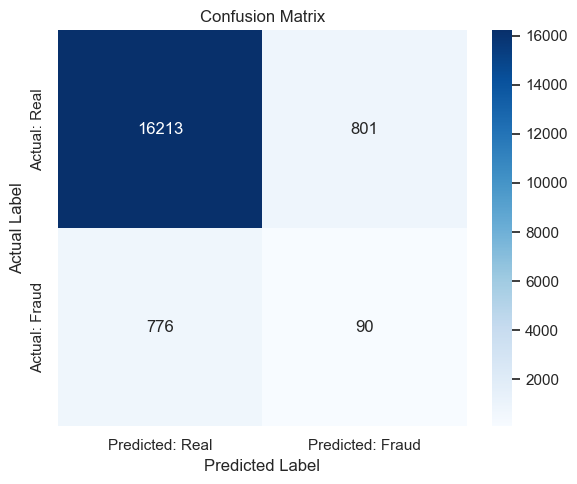

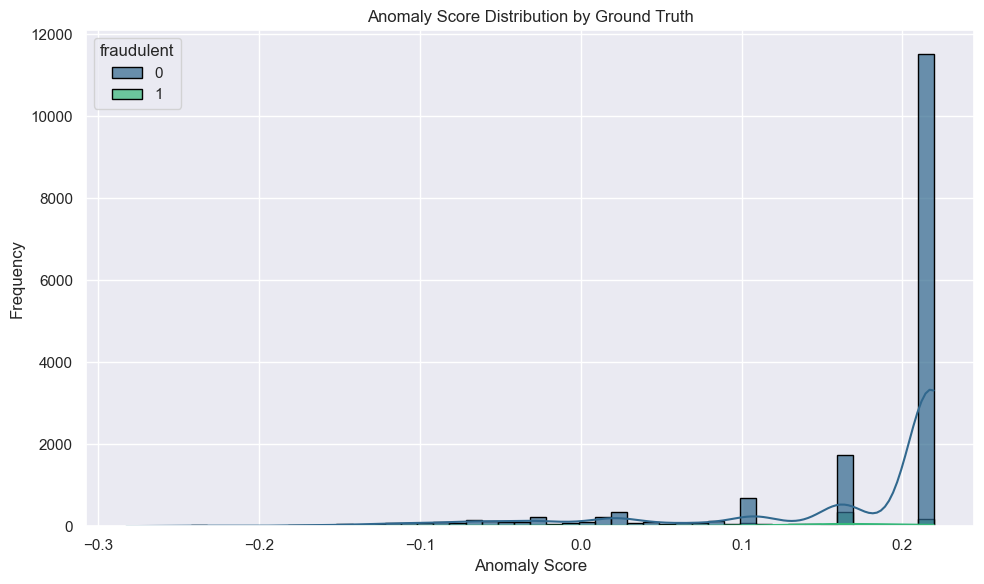

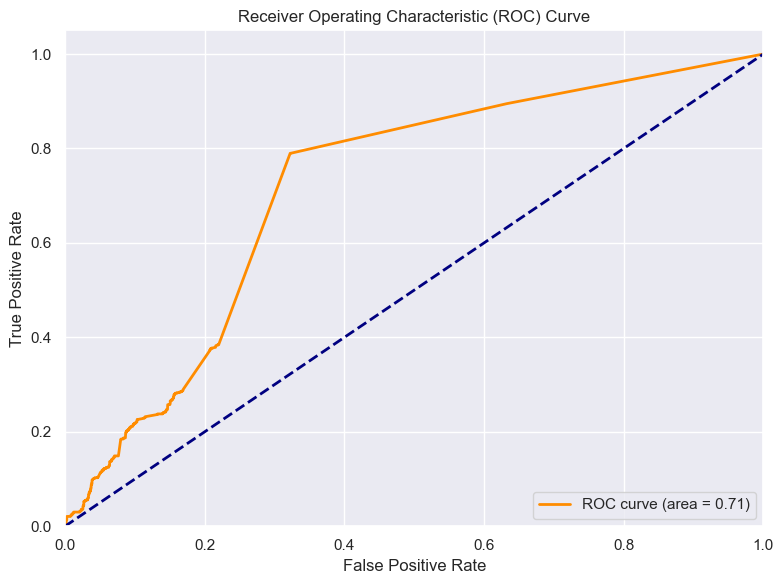

In [689]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Load the Cleaned Dataset (With Original Details & Ground Truth Labels) 
df_cleaned = pd.read_csv('investigative_postings_cleaned.csv')

# Load the Refined Results with Isolation Forest Predictions
df_pred = pd.read_csv('investigative_postings_with_refined_anomaly_scores.csv')

# Merge the Two Datasets on their Index
df_merged = df_cleaned.merge(df_pred[['is_fraud_refined', 'anomaly_score']], left_index=True, right_index=True)
print("Merged dataset shape:", df_merged.shape)

# Ensure Ground Truth Column Exists
if 'fraudulent' not in df_merged.columns:
    raise ValueError("Ground truth column 'fraudulent' not found in the merged dataset. "
                     "Ensure that the cleaned dataset includes the 'fraudulent' label.")
else:
    # Ground truth and predictions
    y_true = df_merged['fraudulent']
    y_pred = df_merged['is_fraud_refined']

# Calculate Evaluation Metrics
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
conf_mat = confusion_matrix(y_true, y_pred)

print("Precision Score: {:.4f}".format(precision))
print("Recall Score: {:.4f}".format(recall))
print("F1-Score: {:.4f}".format(f1))
print("Confusion Matrix:\n", conf_mat)

# Visualize the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted: Real", "Predicted: Fraud"],
            yticklabels=["Actual: Real", "Actual: Fraud"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()

# Visualize Anomaly Score Distribution Stratified by Ground Truth
plt.figure(figsize=(10, 6))
sns.histplot(data=df_merged, x='anomaly_score', hue='fraudulent', bins=50, kde=True,
             palette="viridis", alpha=0.7, edgecolor='black')
plt.title("Anomaly Score Distribution by Ground Truth")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Additional Visualization - ROC Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_true, -df_merged['anomaly_score'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Isolation Forest with NLP

Loaded dataset with shape: (17880, 219)
'text' column found.
TF-IDF features shape: (17880, 200)
Numeric features shape: (17880, 3)
Boolean features shape: (17880, 3)
Combined features shape: (17880, 206)
Results saved as 'investigative_postings_with_nlp_isolationforest_results.csv'.

Evaluation Metrics:
Precision Score: 0.0459
Recall Score: 0.0947
F1-Score: 0.0618
Confusion Matrix:
 [[15308  1706]
 [  784    82]]


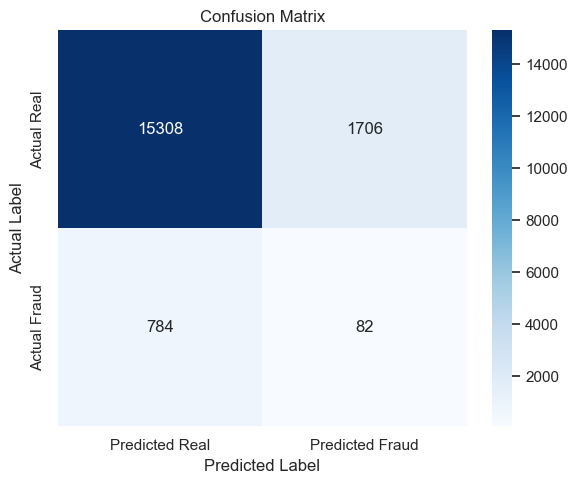

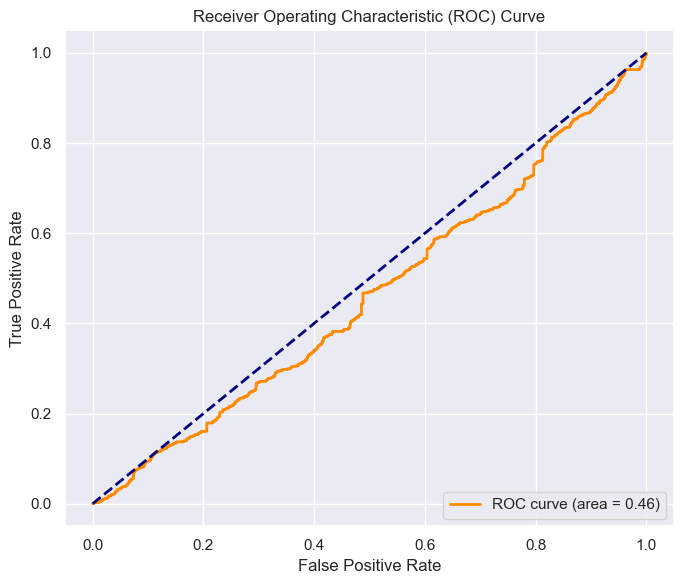

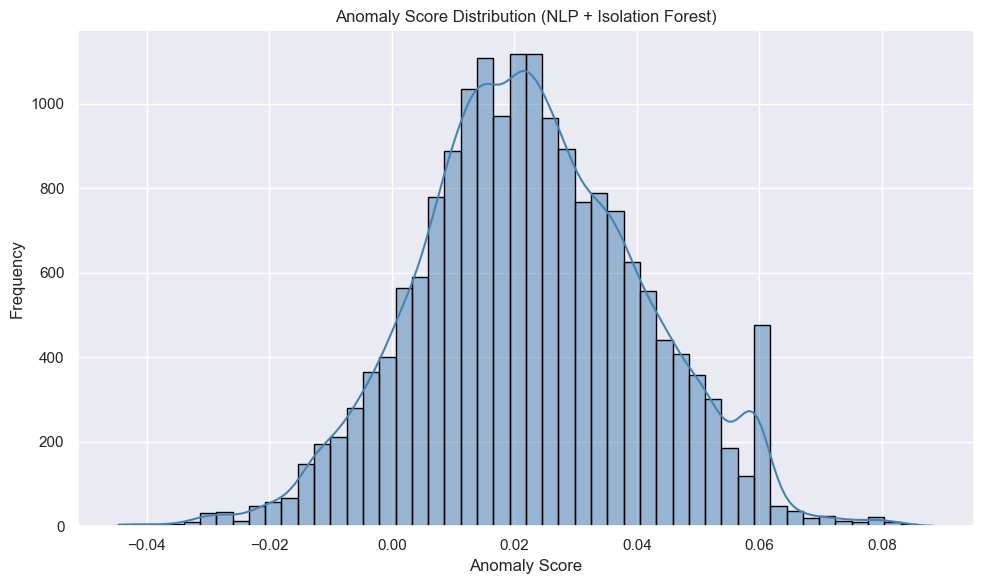

In [692]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc



# Load the Cleaned Dataset and Prepare Text Data
df = pd.read_csv('investigative_postings_cleaned.csv')
print("Loaded dataset with shape:", df.shape)

# If a consolidated 'text' column is absent, create it from textual columns.
text_columns = ['description', 'company_profile', 'requirements', 'benefits']
if 'text' not in df.columns:
    existing_text_cols = [col for col in text_columns if col in df.columns]
    if existing_text_cols:
        # Concatenate the available text columns (fill NAs with empty strings)
        df['text'] = df[existing_text_cols].fillna('').apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
        print("Created 'text' column by concatenating:", existing_text_cols)
    else:
        raise ValueError("No textual columns found to create 'text'.")
else:
    print("'text' column found.")



# Extract NLP Features using TF-IDF
# Initialize TfidfVectorizer with stopwords removal and a maximum of 200 features.
tfidf = TfidfVectorizer(stop_words='english', max_features=200)
tfidf_features = tfidf.fit_transform(df['text'])
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf.get_feature_names_out())
print("TF-IDF features shape:", tfidf_df.shape)



# Process Numeric Features
numeric_cols = ['salary_min', 'salary_max', 'salary_range']
# Fill missing numeric values if any.
df[numeric_cols] = df[numeric_cols].fillna(0)
scaler = StandardScaler()
numeric_features = scaler.fit_transform(df[numeric_cols])
numeric_df = pd.DataFrame(numeric_features, columns=numeric_cols)
print("Numeric features shape:", numeric_df.shape)



# Process Boolean Features (if available)
bool_cols = ["telecommuting", "has_company_logo", "has_questions"]
if all(col in df.columns for col in bool_cols):
    bool_df = df[bool_cols].astype(int).reset_index(drop=True)
    print("Boolean features shape:", bool_df.shape)
else:
    bool_df = pd.DataFrame()
    print("One or more boolean columns missing; skipping boolean features.")



# Combine All Features (Numeric + NLP + Boolean)
# Concatenate along axis=1; ensure indices align by resetting if needed.
combined_features = pd.concat([
    numeric_df.reset_index(drop=True),
    tfidf_df.reset_index(drop=True),
    bool_df.reset_index(drop=True)
], axis=1)
combined_features.fillna(0, inplace=True)
print("Combined features shape:", combined_features.shape)



# Fit Isolation Forest on Combined Features
# IMPORTANT: Fit the model only on the features (do not include extra columns).
iso_model = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
iso_model.fit(combined_features)

# Compute anomaly score and predictions on the feature set.
anomaly_scores = iso_model.decision_function(combined_features)
predictions = iso_model.predict(combined_features)  # -1 for outliers, 1 for inliers
# Convert predictions to binary flags: 1 if outlier (fraud) else 0.
is_fraud = np.where(predictions == -1, 1, 0)



# Create a New Results DataFrame (Do Not Merge with Original Data)
results_df = df.copy()  # Copy original cleaned data.
results_df['anomaly_score'] = anomaly_scores
results_df['anomaly'] = predictions
results_df['is_fraud'] = is_fraud

# Save results into a new file.
results_output_file = "investigative_postings_with_nlp_isolationforest_results.csv"
results_df.to_csv(results_output_file, index=False)
print("Results saved as '{}'.".format(results_output_file))



# Evaluation Metrics and Visualizations (If Ground Truth is Available)
# Ensure that a ground truth column exists.
if 'fraudulent' in results_df.columns:
    y_true = results_df['fraudulent']
    y_pred = results_df['is_fraud']
    
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    
    print("\nEvaluation Metrics:")
    print("Precision Score: {:.4f}".format(precision))
    print("Recall Score: {:.4f}".format(recall))
    print("F1-Score: {:.4f}".format(f1))
    print("Confusion Matrix:\n", cm)
    
    # Confusion Matrix Heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Predicted Real", "Predicted Fraud"],
                yticklabels=["Actual Real", "Actual Fraud"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.tight_layout()
    plt.show()
    
    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_true, -anomaly_scores)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(7, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label="ROC curve (area = {:.2f})".format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()
else:
    print("Ground truth column 'fraudulent' not found; skipping evaluation metrics.")



# Visualize Anomaly Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(results_df['anomaly_score'], bins=50, kde=True, color='steelblue', edgecolor='black')
plt.title("Anomaly Score Distribution (NLP + Isolation Forest)")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# One-Class SVM With NLP

Loaded cleaned dataset with shape: (17880, 219)
'text' column found.
TF-IDF features shape: (17880, 200)
Numeric features shape: (17880, 3)
Boolean features shape: (17880, 3)
Combined features shape: (17880, 206)
Results saved as 'investigative_postings_with_ocsvm_results.csv'.

Evaluation Metrics for One-Class SVM:
Precision: 0.1120
Recall: 0.2309
F1-Score: 0.1508
Confusion Matrix:
[[15428  1586]
 [  666   200]]


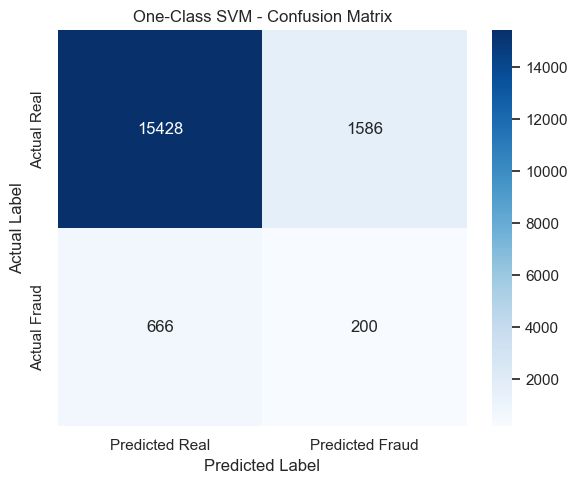

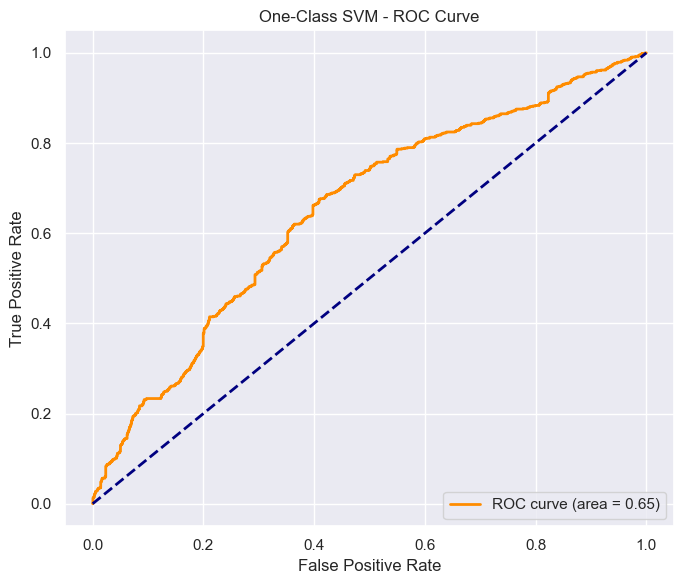

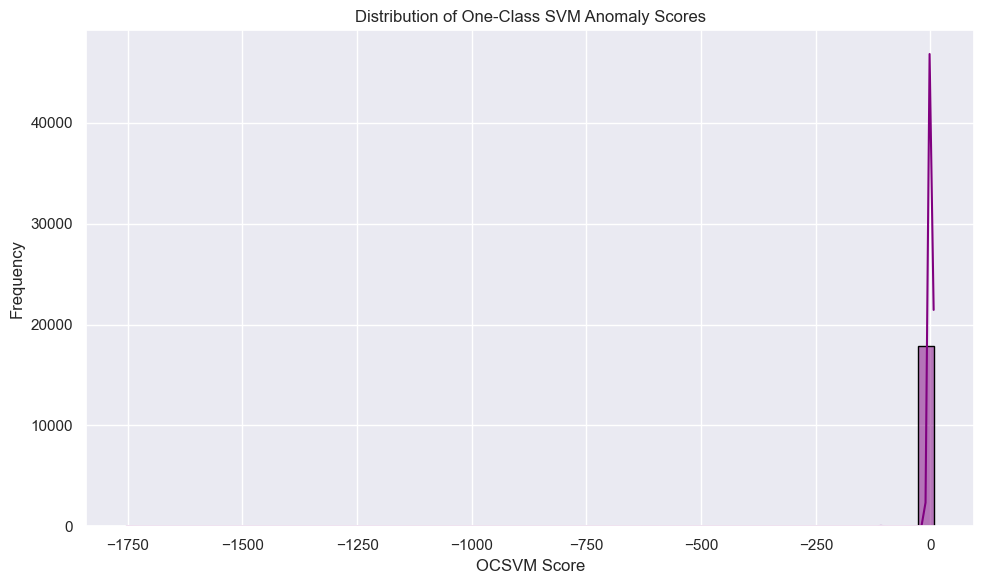


Fraudulent Job Listings (One-Class SVM):
       job_id                                              title  \
37         38                                    PROJECT MANAGER   
73         74                                 Specialist Obs/Gyn   
78         79  200K + MANAGEMENT POSITION FOR EXPERIENCED MER...   
92         93                WAH Customer Service Repersentative   
102       103                            Marketing Administrator   
...       ...                                                ...   
17822   17823                                             5 Guys   
17824   17825                        Military Benefits Counselor   
17833   17834                                       Web Designer   
17859   17860     Immediate Requirement: iOS Developer for Qatar   
17869   17870                             Sr Technical Lead LIMS   

                 location       department  
37        US, TX, HOUSTON          Unknown  
73          AE, DU, Dubai          Unknown  
78    

In [571]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import OneClassSVM
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc



### 1. Load and Prepare Data
df = pd.read_csv("investigative_postings_cleaned.csv")
print("Loaded cleaned dataset with shape:", df.shape)

# If a consolidated 'text' column is missing, create it from available textual columns
text_columns = ['description', 'company_profile', 'requirements', 'benefits']
if 'text' not in df.columns:
    existing_text_cols = [col for col in text_columns if col in df.columns]
    if existing_text_cols:
        df['text'] = df[existing_text_cols].fillna('').apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
        print("Created 'text' column by concatenating:", existing_text_cols)
    else:
        raise ValueError("No textual columns found to create 'text'.")
else:
    print("'text' column found.")



### 2. Extract NLP Features using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=200)
tfidf_features = tfidf.fit_transform(df['text'])
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf.get_feature_names_out())
print("TF-IDF features shape:", tfidf_df.shape)



### 3. Process Numeric Features
numeric_cols = ['salary_min', 'salary_max', 'salary_range']
df[numeric_cols] = df[numeric_cols].fillna(0)
scaler = StandardScaler()
numeric_features = scaler.fit_transform(df[numeric_cols])
numeric_df = pd.DataFrame(numeric_features, columns=numeric_cols)
print("Numeric features shape:", numeric_df.shape)



### 4. Handle Boolean Features (If Available)
bool_cols = ["telecommuting", "has_company_logo", "has_questions"]
if all(col in df.columns for col in bool_cols):
    bool_df = df[bool_cols].astype(int).reset_index(drop=True)
    print("Boolean features shape:", bool_df.shape)
else:
    bool_df = pd.DataFrame()
    print("Some boolean columns missing; skipping boolean features.")



### 5. Combine All Features (Numeric + TF-IDF + Boolean)
combined_features = pd.concat(
    [numeric_df.reset_index(drop=True), tfidf_df.reset_index(drop=True), bool_df.reset_index(drop=True)],
    axis=1
)
combined_features.fillna(0, inplace=True)
print("Combined features shape:", combined_features.shape)



### 6. Fit One-Class SVM Model
# Set nu=0.1 (expected fraction of outliers); you can adjust kernel parameters as needed.
ocsvm = OneClassSVM(nu=0.1, kernel="rbf", gamma="auto")
ocsvm.fit(combined_features)



### 7. Detect Anomalies
# Compute decision function scores and predictions (-1 indicates outlier, 1 indicates inlier).
ocsvm_scores = ocsvm.decision_function(combined_features)
ocsvm_predictions = ocsvm.predict(combined_features)

# Convert predictions to binary flags: 1 for anomaly (fraud), 0 for normal.
ocsvm_is_fraud = np.where(ocsvm_predictions == -1, 1, 0)



### 8. Evaluate Performance
# Create a New Results DataFrame
results_df = df.copy()  # Copy original cleaned data.
results_df['ocsvm_score'] = ocsvm_scores
results_df['ocsvm_prediction'] = ocsvm_predictions
results_df['is_fraud_ocsvm'] = ocsvm_is_fraud

# Save the complete results to a new file.
results_output_file = "investigative_postings_with_ocsvm_results.csv"
results_df.to_csv(results_output_file, index=False)
print("Results saved as '{}'.".format(results_output_file))

# Evaluation Metrics and Visualizations (If Ground Truth Exists)
if 'fraudulent' in results_df.columns:
    y_true = results_df['fraudulent']
    y_pred = results_df['is_fraud_ocsvm']
    
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    
    print("\nEvaluation Metrics for One-Class SVM:")
    print("Precision: {:.4f}".format(precision))
    print("Recall: {:.4f}".format(recall))
    print("F1-Score: {:.4f}".format(f1))
    print("Confusion Matrix:")
    print(cm)
    
    # Plot the Confusion Matrix as a Heatmap.
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Predicted Real", "Predicted Fraud"],
                yticklabels=["Actual Real", "Actual Fraud"])
    plt.title("One-Class SVM - Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.tight_layout()
    plt.show()
    
    # ROC Curve (Using Negative OCSVM Score as a Proxy for Fraud Probability)
    fpr, tpr, thresholds = roc_curve(y_true, -ocsvm_scores)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(7, 6))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = {:.2f})".format(roc_auc))
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("One-Class SVM - ROC Curve")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()
else:
    print("Ground truth column 'fraudulent' not found; skipping evaluation metrics.")



### 9. Visualize Results
plt.figure(figsize=(10, 6))
sns.histplot(results_df['ocsvm_score'], bins=50, kde=True, color='purple', edgecolor='black')
plt.title("Distribution of One-Class SVM Anomaly Scores")
plt.xlabel("OCSVM Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()



### 10. Identify Fraudulent Listings
# Specify the columns to display (ensure these columns exist in the cleaned dataset)
details_columns = ['job_id', 'title', 'location', 'department']
fraudulent_listings = results_df[results_df['is_fraud_ocsvm'] == 1][details_columns]
print("\nFraudulent Job Listings (One-Class SVM):")
print(fraudulent_listings)

# Save the fraudulent listings with details to a new file.
fraudulent_output_file = "fraudulent_job_listings_with_details_ocsvm.csv"
fraudulent_listings.to_csv(fraudulent_output_file, index=False)
print("Fraudulent job listings saved as '{}'.".format(fraudulent_output_file))

#   Comparison of 4 Machine Learning Algorithms
### 1) IF without NLP
### 2) IF with NLP
### 3) OCSVM without NLP
### 4) OCSVM with NLP

Loaded cleaned dataset with shape: (17880, 219)
Features without NLP shape: (17880, 6)
'text' column exists.
TF-IDF features shape: (17880, 200)
Features with NLP shape: (17880, 206)

--- Evaluation Metrics ---
Isolation Forest without NLP -> Precision: 0.0993, Recall: 0.1998, F1: 0.1327, ROC AUC: 0.7156
Isolation Forest with NLP    -> Precision: 0.0436, Recall: 0.0901, F1: 0.0588, ROC AUC: 0.4876
One-Class SVM without NLP     -> Precision: 0.0944, Recall: 0.2517, F1: 0.1373, ROC AUC: 0.7276
One-Class SVM with NLP        -> Precision: 0.1120, Recall: 0.2309, F1: 0.1508, ROC AUC: 0.6511


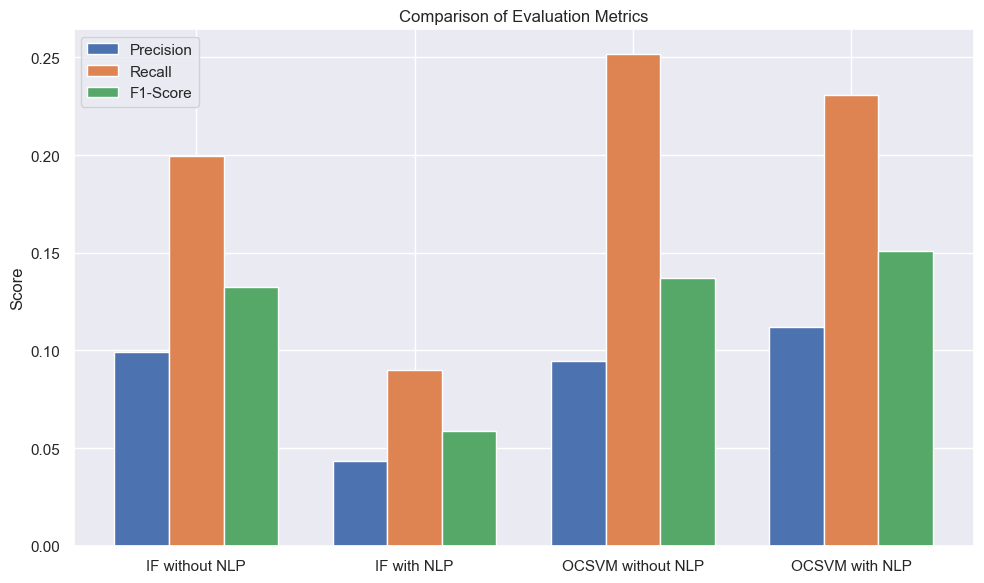

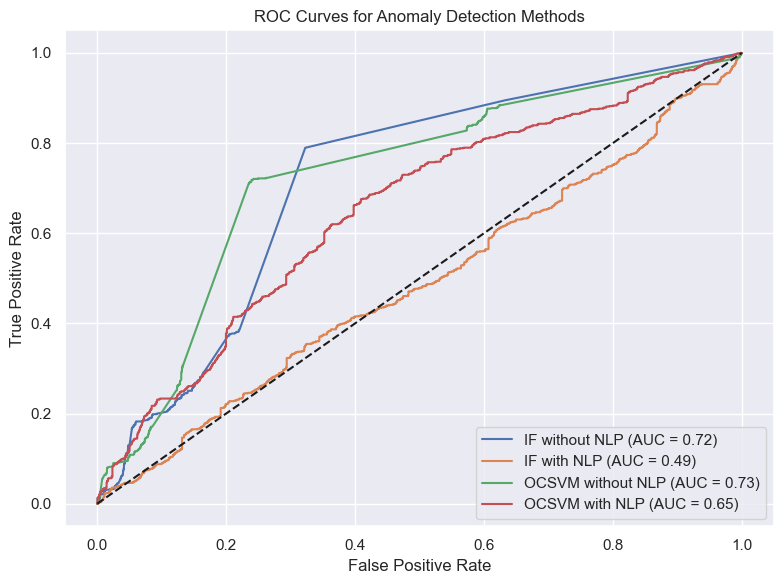


Based on the F1-Score, the best method is: OCSVM with NLP
Comparison results saved as 'comparison_results.csv'.
Fraudulent job listings saved as 'fraudulent_job_listings_comparison.csv'.


In [699]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc



### 1. Load the Cleaned Dataset and Check Ground Truth
df = pd.read_csv("investigative_postings_cleaned.csv")
print("Loaded cleaned dataset with shape:", df.shape)

if "fraudulent" not in df.columns:
    raise ValueError("Ground truth column 'fraudulent' not found in the dataset.")
    
y_true = df["fraudulent"]



###  2. Prepare Features for Comparison
###     (A) Without NLP: Numeric and Boolean features
###     (B) With NLP: Numeric, Boolean, and TF-IDF features

# Numeric Features
numeric_cols = ['salary_min', 'salary_max', 'salary_range']
df[numeric_cols] = df[numeric_cols].fillna(0)
scaler = StandardScaler()
numeric_features = scaler.fit_transform(df[numeric_cols])
numeric_df = pd.DataFrame(numeric_features, columns=numeric_cols)

# Boolean Features
bool_cols = ["telecommuting", "has_company_logo", "has_questions"]
if all(col in df.columns for col in bool_cols):
    bool_df = df[bool_cols].astype(int).reset_index(drop=True)
else:
    bool_df = pd.DataFrame()
    
# Features for Methods without NLP:
features_no_nlp = pd.concat([numeric_df.reset_index(drop=True), bool_df.reset_index(drop=True)], axis=1)
features_no_nlp.fillna(0, inplace=True)
print("Features without NLP shape:", features_no_nlp.shape)

# Text Features via TF-IDF
# Create a Consolidated 'Text' Column if Missing, using Available Textual Columns.
text_columns = ['description', 'company_profile', 'requirements', 'benefits']
if 'text' not in df.columns:
    existing_text_cols = [col for col in text_columns if col in df.columns]
    if existing_text_cols:
        df['text'] = df[existing_text_cols].fillna('').apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
        print("Created 'text' column by concatenating:", existing_text_cols)
    else:
        raise ValueError("No textual columns found to create 'text'.")
else:
    print("'text' column exists.")

tfidf = TfidfVectorizer(stop_words='english', max_features=200)
tfidf_features = tfidf.fit_transform(df['text'])
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf.get_feature_names_out())
print("TF-IDF features shape:", tfidf_df.shape)

# Features for Methods with NLP:
features_with_nlp = pd.concat([numeric_df.reset_index(drop=True),
                               bool_df.reset_index(drop=True),
                               tfidf_df.reset_index(drop=True)], axis=1)
features_with_nlp.fillna(0, inplace=True)
print("Features with NLP shape:", features_with_nlp.shape)



### 3. Define and Train the Four Methods
# Method 1: Isolation Forest without NLP
iforest_no = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
iforest_no.fit(features_no_nlp)
if_no_scores = iforest_no.decision_function(features_no_nlp)
if_no_pred = iforest_no.predict(features_no_nlp)
if_no_flag = np.where(if_no_pred == -1, 1, 0)

# Method 2: Isolation Forest with NLP
iforest_with = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
iforest_with.fit(features_with_nlp)
if_with_scores = iforest_with.decision_function(features_with_nlp)
if_with_pred = iforest_with.predict(features_with_nlp)
if_with_flag = np.where(if_with_pred == -1, 1, 0)

# Method 3: One-Class SVM without NLP
ocsvm_no = OneClassSVM(nu=0.1, kernel='rbf', gamma='auto')
ocsvm_no.fit(features_no_nlp)
ocsvm_no_scores = ocsvm_no.decision_function(features_no_nlp)
ocsvm_no_pred = ocsvm_no.predict(features_no_nlp)
ocsvm_no_flag = np.where(ocsvm_no_pred == -1, 1, 0)

# Method 4: One-Class SVM with NLP
ocsvm_with = OneClassSVM(nu=0.1, kernel='rbf', gamma='auto')
ocsvm_with.fit(features_with_nlp)
ocsvm_with_scores = ocsvm_with.decision_function(features_with_nlp)
ocsvm_with_pred = ocsvm_with.predict(features_with_nlp)
ocsvm_with_flag = np.where(ocsvm_with_pred == -1, 1, 0)



### 4. Evaluation Metrics Function
def compute_metrics(y_true, y_pred, scores):
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    fpr, tpr, _ = roc_curve(y_true, -scores)  # Using negative score as proxy probability
    roc_auc = auc(fpr, tpr)
    return prec, rec, f1, roc_auc, fpr, tpr

metrics_if_no = compute_metrics(y_true, if_no_flag, if_no_scores)
metrics_if_with = compute_metrics(y_true, if_with_flag, if_with_scores)
metrics_ocsvm_no = compute_metrics(y_true, ocsvm_no_flag, ocsvm_no_scores)
metrics_ocsvm_with = compute_metrics(y_true, ocsvm_with_flag, ocsvm_with_scores)

prec_if_no, rec_if_no, f1_if_no, auc_if_no, fpr_if_no, tpr_if_no = metrics_if_no
prec_if_with, rec_if_with, f1_if_with, auc_if_with, fpr_if_with, tpr_if_with = metrics_if_with
prec_ocsvm_no, rec_ocsvm_no, f1_ocsvm_no, auc_ocsvm_no, fpr_ocsvm_no, tpr_ocsvm_no = metrics_ocsvm_no
prec_ocsvm_with, rec_ocsvm_with, f1_ocsvm_with, auc_ocsvm_with, fpr_ocsvm_with, tpr_ocsvm_with = metrics_ocsvm_with



### 5. Print Evaluation Metrics
print("\n--- Evaluation Metrics ---")
print("Isolation Forest without NLP -> Precision: {:.4f}, Recall: {:.4f}, F1: {:.4f}, ROC AUC: {:.4f}".format(prec_if_no, rec_if_no, f1_if_no, auc_if_no))
print("Isolation Forest with NLP    -> Precision: {:.4f}, Recall: {:.4f}, F1: {:.4f}, ROC AUC: {:.4f}".format(prec_if_with, rec_if_with, f1_if_with, auc_if_with))
print("One-Class SVM without NLP     -> Precision: {:.4f}, Recall: {:.4f}, F1: {:.4f}, ROC AUC: {:.4f}".format(prec_ocsvm_no, rec_ocsvm_no, f1_ocsvm_no, auc_ocsvm_no))
print("One-Class SVM with NLP        -> Precision: {:.4f}, Recall: {:.4f}, F1: {:.4f}, ROC AUC: {:.4f}".format(prec_ocsvm_with, rec_ocsvm_with, f1_ocsvm_with, auc_ocsvm_with))



### 6. Plot Comparative Bar Chart for Precision, Recall, and F1-Score
methods = ["IF without NLP", "IF with NLP", "OCSVM without NLP", "OCSVM with NLP"]
precisions = [prec_if_no, prec_if_with, prec_ocsvm_no, prec_ocsvm_with]
recalls = [rec_if_no, rec_if_with, rec_ocsvm_no, rec_ocsvm_with]
f1_scores = [f1_if_no, f1_if_with, f1_ocsvm_no, f1_ocsvm_with]

x = np.arange(len(methods))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, precisions, width, label="Precision")
plt.bar(x, recalls, width, label="Recall")
plt.bar(x + width, f1_scores, width, label="F1-Score")
plt.xticks(x, methods)
plt.ylabel("Score")
plt.title("Comparison of Evaluation Metrics")
plt.legend()
plt.tight_layout()
plt.show()



### 7. Plot ROC Curves for All Methods
plt.figure(figsize=(8, 6))
plt.plot(fpr_if_no, tpr_if_no, label="IF without NLP (AUC = {:.2f})".format(auc_if_no))
plt.plot(fpr_if_with, tpr_if_with, label="IF with NLP (AUC = {:.2f})".format(auc_if_with))
plt.plot(fpr_ocsvm_no, tpr_ocsvm_no, label="OCSVM without NLP (AUC = {:.2f})".format(auc_ocsvm_no))
plt.plot(fpr_ocsvm_with, tpr_ocsvm_with, label="OCSVM with NLP (AUC = {:.2f})".format(auc_ocsvm_with))
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Anomaly Detection Methods")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()



### 8. Determine the Best Method Based on F1-Score
f1_scores_list = [f1_if_no, f1_if_with, f1_ocsvm_no, f1_ocsvm_with]
best_index = np.argmax(f1_scores_list)
best_method = methods[best_index]
print("\nBased on the F1-Score, the best method is: {}".format(best_method))



### 9. Create a New Comparison Results File (Do Not Merge with Original Data)
df_comp = df.copy()  # Copy original cleaned data

# Add columns for each method's outputs:
df_comp["if_no_score"] = if_no_scores
df_comp["if_no_pred"] = if_no_pred
df_comp["if_no_flag"] = if_no_flag

df_comp["if_with_score"] = if_with_scores
df_comp["if_with_pred"] = if_with_pred
df_comp["if_with_flag"] = if_with_flag

df_comp["ocsvm_no_score"] = ocsvm_no_scores
df_comp["ocsvm_no_pred"] = ocsvm_no_pred
df_comp["ocsvm_no_flag"] = ocsvm_no_flag

df_comp["ocsvm_with_score"] = ocsvm_with_scores
df_comp["ocsvm_with_pred"] = ocsvm_with_pred
df_comp["ocsvm_with_flag"] = ocsvm_with_flag

comparison_file = "comparison_results.csv"
df_comp.to_csv(comparison_file, index=False)
print("Comparison results saved as '{}'.".format(comparison_file))



### 10. Save Fraudulent Listings (Based on the Best Method) to a New File
details_cols = ["job_id", "title", "location", "department"]
if best_method == "IF without NLP":
    fraud_mask = df_comp["if_no_flag"] == 1
elif best_method == "IF with NLP":
    fraud_mask = df_comp["if_with_flag"] == 1
elif best_method == "OCSVM without NLP":
    fraud_mask = df_comp["ocsvm_no_flag"] == 1
else:  # "OCSVM with NLP"
    fraud_mask = df_comp["ocsvm_with_flag"] == 1

fraudulent_listings = df_comp[fraud_mask][details_cols]
fraudulent_file = "fraudulent_job_listings_comparison.csv"
fraudulent_listings.to_csv(fraudulent_file, index=False)
print("Fraudulent job listings saved as '{}'.".format(fraudulent_file))

# Final Analysis, Comparison & Recommendations


=== Final Analysis Summary ===
Research Question:
Can we detect fraudulent job postings in an unsupervised manner using Isolation Forest and One-Class SVM,
and which method offers better anomaly detection performance?

Summary of Our Experiments:
  We have implemented and compared four methods:
    1) Isolation Forest without NLP (using numeric and Boolean features)
    2) Isolation Forest with NLP (using numeric, Boolean, and TF-IDF text features)
    3) One-Class SVM without NLP (using numeric and Boolean features)
    4) One-Class SVM with NLP (using numeric, Boolean, and TF-IDF text features)

Based on evaluation metrics (Precision, Recall, F1-Score, ROC AUC) and visualizations,
the best performing method (highest F1-Score) was: OCSVM with NLP
This suggests that unsupervised anomaly detection methods, particularly OCSVM with NLP,
are effective at identifying potentially fraudulent job postings.


SHAP library not installed. To perform model interpretability analysis, please instal

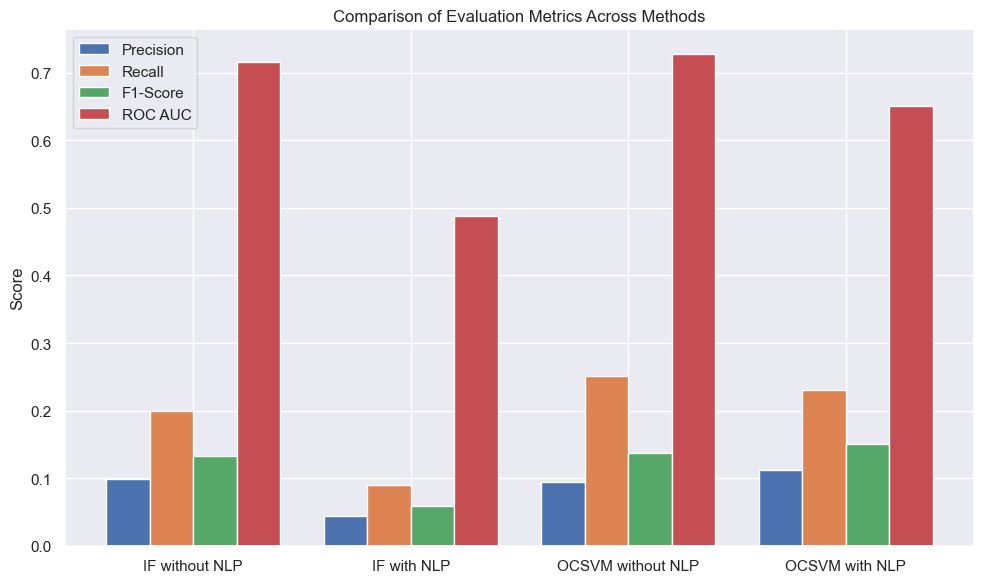

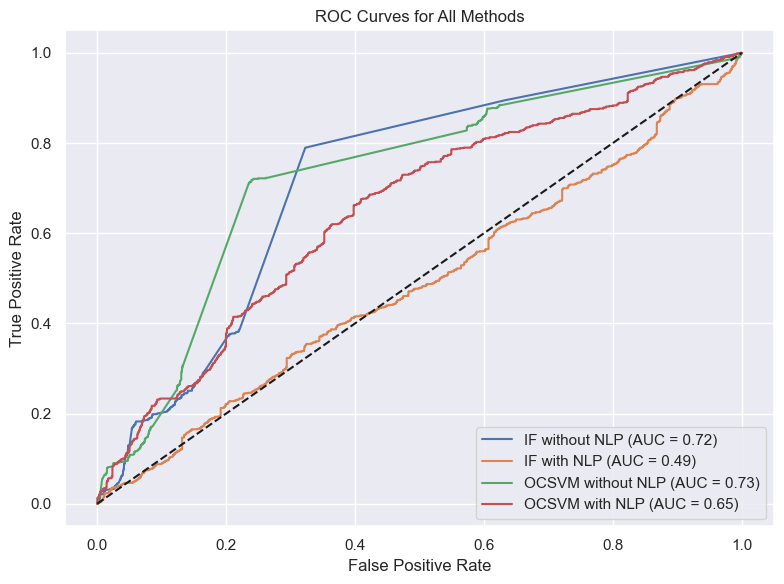


Fraudulent job listings (based on the best method: OCSVM with NLP) saved as 'fraudulent_job_listings_comparison.csv'.

Overall, our experiments support the feasibility of detecting fraudulent job postings in an unsupervised manner.
Further improvements, such as incorporating additional domain-specific data and more advanced interpretability,
could help refine the detection process even further.


In [702]:
# Print a final summary based on our experiments
print("\n=== Final Analysis Summary ===")
print("Research Question:")
print("Can we detect fraudulent job postings in an unsupervised manner using Isolation Forest and One-Class SVM,")
print("and which method offers better anomaly detection performance?")
print("\nSummary of Our Experiments:")
print("  We have implemented and compared four methods:")
print("    1) Isolation Forest without NLP (using numeric and Boolean features)")
print("    2) Isolation Forest with NLP (using numeric, Boolean, and TF-IDF text features)")
print("    3) One-Class SVM without NLP (using numeric and Boolean features)")
print("    4) One-Class SVM with NLP (using numeric, Boolean, and TF-IDF text features)")
print("\nBased on evaluation metrics (Precision, Recall, F1-Score, ROC AUC) and visualizations,")
print("the best performing method (highest F1-Score) was: {}".format(best_method))
print("This suggests that unsupervised anomaly detection methods, particularly {},".format(best_method))
print("are effective at identifying potentially fraudulent job postings.\n")

# SHAP Analysis for Feature Contribution on the Best Method
# This block attempts to generate a SHAP summary plot if the SHAP library is available.
try:
    import shap
    # Select the best model and feature set if the best method is one of the Isolation Forest models.
    if best_method == "IF with NLP":
        best_model = iforest_with
        best_features = features_with_nlp
    elif best_method == "IF without NLP":
        best_model = iforest_no
        best_features = features_no_nlp
    else:
        best_model = None  # For One-Class SVM models, SHAP analysis requires different approaches.
    
    if best_model is not None:
        print("\nGenerating SHAP summary plot for the best model...")
        explainer = shap.TreeExplainer(best_model)
        shap_values = explainer.shap_values(best_features)
        plt.figure(figsize=(10, 6))
        shap.summary_plot(shap_values, best_features, feature_names=best_features.columns)
    else:
        print("\nSHAP analysis not performed for One-Class SVM models.")
except ImportError:
    print("\nSHAP library not installed. To perform model interpretability analysis, please install it via 'pip install shap'.")

# Additional Comparative Visualizations
# Comparative Bar Chart for Evaluation Metrics (Precision, Recall, F1-Score, ROC AUC)
plt.figure(figsize=(10, 6))
metric_names = ['Precision', 'Recall', 'F1-Score', 'ROC AUC']
# Create a Matrix of the Metric Values for each Method
metrics_matrix = np.array([
    [prec_if_no, rec_if_no, f1_if_no, auc_if_no],
    [prec_if_with, rec_if_with, f1_if_with, auc_if_with],
    [prec_ocsvm_no, rec_ocsvm_no, f1_ocsvm_no, auc_ocsvm_no],
    [prec_ocsvm_with, rec_ocsvm_with, f1_ocsvm_with, auc_ocsvm_with]
])
methods_labels = ["IF without NLP", "IF with NLP", "OCSVM without NLP", "OCSVM with NLP"]

x = np.arange(len(methods_labels))
width = 0.2
for i, metric in enumerate(metric_names):
    plt.bar(x + i * width - width * 1.5, metrics_matrix[:, i], width, label=metric)
plt.xticks(x, methods_labels)
plt.ylabel("Score")
plt.title("Comparison of Evaluation Metrics Across Methods")
plt.legend()
plt.tight_layout()
plt.show()

# ROC Curves for All Four Methods
plt.figure(figsize=(8, 6))
plt.plot(fpr_if_no, tpr_if_no, label="IF without NLP (AUC = {:.2f})".format(auc_if_no))
plt.plot(fpr_if_with, tpr_if_with, label="IF with NLP (AUC = {:.2f})".format(auc_if_with))
plt.plot(fpr_ocsvm_no, tpr_ocsvm_no, label="OCSVM without NLP (AUC = {:.2f})".format(auc_ocsvm_no))
plt.plot(fpr_ocsvm_with, tpr_ocsvm_with, label="OCSVM with NLP (AUC = {:.2f})".format(auc_ocsvm_with))
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Methods")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()



# Final Conclusion: Saving Fraudulent Listings for the Best Method
# Save Fraudulent Listings to a New File based on the Best Performing Method
details_cols = ["job_id", "title", "location", "department"]
if best_method == "IF without NLP":
    fraud_mask = df_comp["if_no_flag"] == 1
elif best_method == "IF with NLP":
    fraud_mask = df_comp["if_with_flag"] == 1
elif best_method == "OCSVM without NLP":
    fraud_mask = df_comp["ocsvm_no_flag"] == 1
else:  # "OCSVM with NLP"
    fraud_mask = df_comp["ocsvm_with_flag"] == 1

fraudulent_listings_final = df_comp[fraud_mask][details_cols]
fraudulent_final_file = "fraudulent_job_listings_comparison.csv"
fraudulent_listings_final.to_csv(fraudulent_final_file, index=False)
print("\nFraudulent job listings (based on the best method: {}) saved as '{}'.".format(best_method, fraudulent_final_file))

print("\nOverall, our experiments support the feasibility of detecting fraudulent job postings in an unsupervised manner.")
print("Further improvements, such as incorporating additional domain-specific data and more advanced interpretability,")
print("could help refine the detection process even further.")